# Chapter 1: Introduction

# Chapter 2: Mathematical Background

# Chapter 3: Introduction to the Numerical Methods

This is a basic template for an ODE solver. We are using the logistic equation as an example here.

## The first thing to do is to import the libraries that we need.

In [58]:
#this resets the variables
from IPython import get_ipython 
get_ipython().magic('reset -sf') 
#Numpy is the main numerical package. 
import numpy as np
#This is a very good plotting library that mimics Matlab
from matplotlib import pyplot
# There are many numerical ODE solvers but this one is quite flexible
from scipy.integrate import solve_ivp
#ready the plots -- 
pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible



We now define all our functions. Unlike Matlab, functions in Python can be defined anywhere. Personally I put them at the top and all the running commands are below -- this is the way many other languages are organized.

In [59]:
def rhs(t,Y,params): 
    r, K = params 
    y=Y
    return [r*y*(K-y)]

Initialize all the parameters and other options. Python is a bit easier to evalulate all solutions on a fixed grid. This does matter, most useful solvers adjust the time points in some optimal way, so the output from the ODE solver includes the time. Often it is usefull to have the solution on a regular grid. 

In [60]:
IC=.2
#Intial time
tstart=0
#Final time
tstop=4
tspan = np.linspace(tstart, tstop, 100) 
#Parameters
params=[.1,100]

Solve the ODEs

In [61]:
y_solution = solve_ivp(lambda t,Y: rhs(t,Y,params), [tstart,tstop], [IC], method='RK45',t_eval=tspan)

Plot the solution:

Text(0.5, 0, 't')

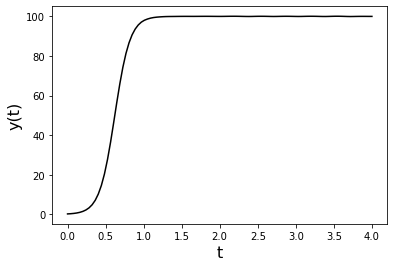

In [62]:
pyplot.plot(y_solution.t, y_solution.y[0],'k',label='y(t)') 
pyplot.ylabel('y(t)',fontsize=16) 
pyplot.xlabel('t',fontsize=16) 
#pyplot.savefig('Logistic.png')

# Chapter 4: Ecology

## Logistic Equation: $\frac{dy}{dt} = ry(1-\frac{y}{k})$

Text(0, 0.5, 'Population')

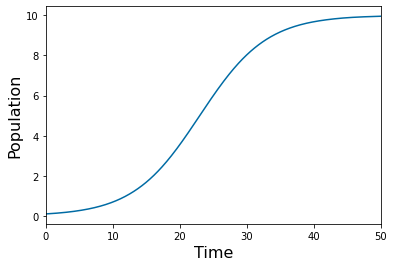

In [63]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 20 12:02:46 2018

@author: cogan

"""

from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp
pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible


#Define the RHS, FIrst for Lotka-Volterra
def f(t,Y,params):
    y=Y
    r,k=params
    return r*y*(1-y/k)
        
params=[.2,10]

t = 0

tspan = np.linspace(0, 50, 500)
y0 = [.1]
ys= solve_ivp(lambda t,Y: f(t,Y,params), [tspan[0],tspan[-1]], y0, method='RK45',t_eval=tspan)

pyplot.plot(tspan, ys.y[0]) # start

pyplot.xlim([tspan[0],tspan[-1]])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Population', fontsize=16)

#pyplot.savefig('logistic.png')


In [64]:
## Phase-plane example: Lotka-Volterra

Text(0, 0.5, '$y_2$')

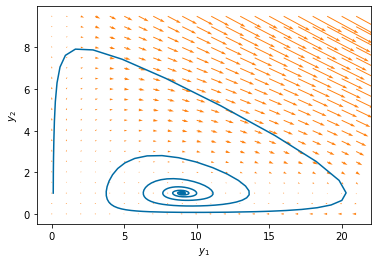

In [65]:
"""
Created on Thu Sep 20 12:02:46 2018

@author: cogan
Adapted from 
http://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

"""
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp

def f(t,Y,params):
    y1,y2=Y
    alpha, beta, delta, gamma=params
    return alpha*y1*y2-delta*y1
def g(t,Y,params):
    y1,y2=Y
    alpha, beta, delta, gamma=params
    return -beta*y1*y2+gamma*y2*(10-y2)
def rhs(t,Y,params):
    y1,y2=Y
    alpha, beta, delta, gamma=params
    return [f(t,Y,params),g(t,Y,params)]

#Define the parameters    
#params=[1,1,.2, 1, 1, 1] 
params=[.2,.1,.2,.1]
#Define the time to simulate
Tfinal=200
#Define the time discretization
tspan = np.linspace(0, Tfinal, 500)
#Define Initial Conditions
IC = [.1, 1]
#Solve the ODE
yp = solve_ivp(lambda t,Y: rhs(t,Y,params), [0,Tfinal], IC, method='RK45',t_eval=tspan)

#Phase-plane View
      
y1 = np.arange(0, 22.0,1)
y2 = np.arange(0, 10.0,.5)
Y1, Y2 = np.meshgrid(y1, y2)

t = 0

pyplot.quiver(Y1, Y2, f(0,[Y1,Y2],params),g(0,[Y1,Y2],params),color='#FF800E')
pyplot.plot(yp.y[0], yp.y[1]) # start
pyplot.xlabel('$y_1$')
pyplot.ylabel('$y_2$')


Plotting the nullclines by plotting the zero level set of each of the right-hand-side functions.

Text(0, 0.5, '$y_2$')

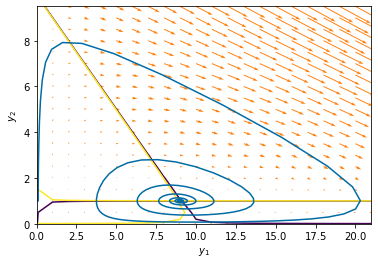

In [66]:


pyplot.contour(Y1, Y2, f(0,[Y1,Y2],params), [-.01,.01])
pyplot.contour(Y1, Y2,g(0,[Y1,Y2],params), [-.01,.01])
pyplot.quiver(Y1, Y2, f(0,[Y1,Y2],params),g(0,[Y1,Y2],params),color='#FF800E')
pyplot.plot(yp.y[0], yp.y[1]) # start
pyplot.xlabel('$y_1$')
pyplot.ylabel('$y_2$')



## Scatter-plots

Text(0.5, 0, 'Parameter Value - $\\gamma$')

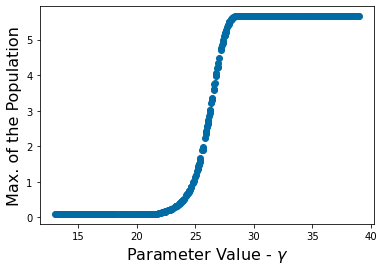

In [67]:
#Define the RHS
def f(t,Y,params):
#    params=[.1,.01,.1,.01]
    y1,y2=Y
    alpha=params[0]
    delta=params[1]
    beta=params[2]
    gamma=params[3]
    return [alpha*y1*y2-delta*y1,-beta*y1*y2+gamma*y2]
        
#==============
#Samples
#==============


Num_samples=500
T_0=0
T_1=26
H_0=.1
P_0=.1
#Choose the parameter space
params_max=np.array([.1,.1,.1,.1,T_1-T_1/2])
params_min=np.array([.28,.28,.25,.25,T_1+T_1/2])
params=(params_max+params_min)/2
p_vals=np.empty(shape=Num_samples)
max_value=np.empty(shape=(Num_samples))
#This fixes which parameter we are exploring
param_num=4
param_dictionary=['$\alpha$', '$\delta$', '$\beta$', '$\gamma$']
for s in np.arange(0,Num_samples):
    #this randomly samples over the hypercube with edges in params_min, params_max
    params[param_num]=np.random.uniform(params_min[param_num],params_max[param_num], size=None) #uniform sampling
    tspan = np.linspace(T_0, params[4], 200)
    Y0 = [H_0, P_0]
    y_solution = solve_ivp(lambda t,Y: f(t,Y,params),  [tspan[0],tspan[-1]],Y0,method='RK45',t_eval=tspan)
    y_plot=y_solution.y
    #this defines the QoI
    max_value[s]=max(y_plot[0,:])
    p_vals[s]=params[param_num]
pyplot.scatter(p_vals,max_value)
pyplot.ylabel('Max. of the Population', fontsize=16)
pyplot.xlabel('Parameter Value - ' r'$\gamma$' , fontsize=16)


## Competetive Exclusion: 
### Solving the equations

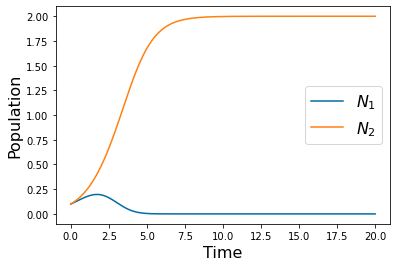

In [68]:
def f(t,Y,params):
    y1,y2=Y
    r1, kappa1, alpha12, r2, kappa2, alpha21 = params
    return r1*y1*(kappa1-y1-alpha12*y2)/kappa1
def g(t,Y,params):
    y1,y2=Y
    r1, kappa1, alpha12, r2, kappa2, alpha21 = params    
    return r2*y2*(kappa2-y2-alpha21*y1)/kappa2
def rhs(t,Y,params):
    y1,y2=Y
    r1, kappa1, alpha12, r2, kappa2, alpha21 = params
    return [f(t,Y,params),g(t,Y,params)]

#Parameter Descriptions
#params=[r1,kappa1,alpha12,r2,kappa2,alpha21]
#Example parameters for different cases of the
#competitive exclusion
#case 1 
params=[1,1,2,1,2,1]
#case 2 params=[1,2,1,1,1,2]
#case 3 params=[1,2,1,1,3,2]
#case 4 params=[1,3,2,1,2,1]



#Sample parameters
Num_samples=500
tspan=np.linspace(0,20,200)
#Initial conditions for N1 and N2
N1_0=.1
N2_0=.1
y_solution = solve_ivp(lambda t,Y: rhs(t,Y,params),  [tspan[0],tspan[-1]],[N1_0, N2_0],method='RK45',t_eval=tspan)

pyplot.plot(tspan,y_solution.y[0])
pyplot.plot(tspan,y_solution.y[1])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Population', fontsize=16)

pyplot.legend(['$N_1$','$N_2$'], fontsize=16)
#

### Linear Regression:

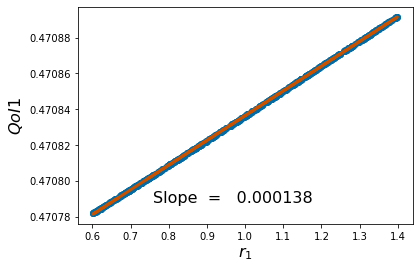

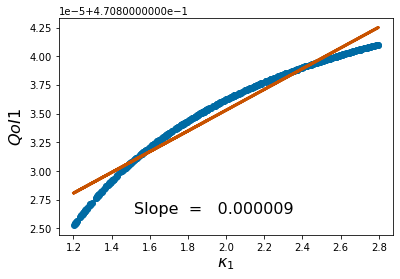

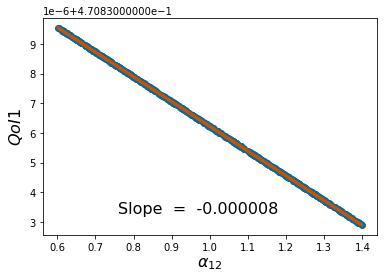

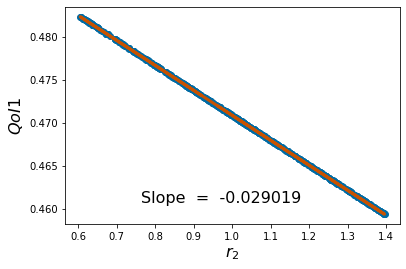

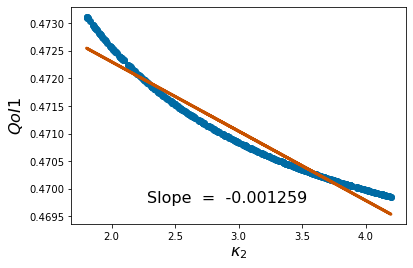

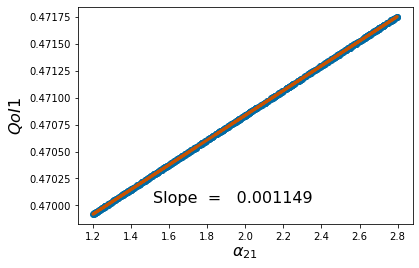

<Figure size 432x288 with 0 Axes>

In [69]:
#Parameter Descriptions
#params=[r1,kappa1,alpha12,r2,kappa2,alpha21]
#Example parameters for different cases of the
#competitive exclusion
#case 1 params=[1,1,2,1,2,1]
#case 2 params=[1,2,1,1,1,2]
#case 3
params=[1,2,1,1,3,2]
#case 4params=[1,3,2,1,2,1]



#Sample parameters
Num_samples=500
tstart=0
tstop=26
#Initial conditions for N1 and N2
N1_0=.1
N2_0=.1
#Bound the parameter sample space
params_max=np.multiply(1.4,[1,2,1,1,3,2])
params_min=np.multiply(.6,[1,2,1,1,3,2])
#just for labelling
pv=['$r_1$','$\\kappa_1$','$\\alpha_{12}$','$r_2$','$\\kappa_2$','$\\alpha_{21}$']
#Initialize QoI
p_vals=np.empty(shape=Num_samples)
#Initialize different QoIs
QoI1=np.empty(shape=(Num_samples))
QoI2=np.empty(shape=(Num_samples))


#This loop runs through all parameters. 
#The outside loop (k)
#fixes the parameter of interest.
#The inside loop (s) 
#goes through each sample

for k in np.arange(0,6): 
    params=(params_max+params_min)/2
    for s in np.arange(0,Num_samples):
        params[k]=np.random.uniform(params_min[k],params_max[k], size=None)
        tspan = np.linspace(tstart, tstop, 200)
        Y0 = [N1_0, N2_0]
        y_solution = solve_ivp(lambda t,Y: rhs(t,Y,params),  [tspan[0],tspan[-1]],Y0,method='RK45',t_eval=tspan)
        ys=y_solution.y
 #       solve_ivp(lambda t,Y: f(t,Y,params),  [tspan[0],tspan[-1]],y0,method='RK45',t_eval=tspan)
        QoI1[s]=ys[-1,0]/(ys[-1,0]+ys[-1,1])
        QoI2[s]=ys[-1,1]/(ys[-1,0]+ys[-1,1])
        p_vals[s]=params[k]
    pyplot.scatter(p_vals, QoI1)
    pyplot.ylabel('$QoI1$', fontsize = 16)
    pyplot.xlabel('%s'%pv[k], fontsize = 16)
    coeffs=np.polyfit(p_vals,QoI1,  1)  #Polyfit interpolates the particular QoI vs parameter data 
                                        #generated with a polynomial. The degree of the polynomial is an option an the return is the 
                                        #coefficent. 
    pyplot.figtext(.3,.2,'Slope  = %10f' %coeffs[0], fontsize = 16)
    pyplot.plot(p_vals,coeffs[1]+coeffs[0]*p_vals,color='#C85200',linewidth=3)
    pyplot.figure()
#    pyplot.savefig('reg_final%d.png' %k,bbox_inches="tight")
 #   pyplot.close('all')


# Chapter 5: Within-host Disease Models

## Steady-state and Jacobian subroutine

In [70]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 23 13:13:54 2021
Slightly different steady-state solver using the scipy package
fsolve.

We also use a generic numerical estimation for the jacobian
based on finite differences. There are more sophisticated ways, but this 
is reasonably effective. 
@author: cogan
"""
from IPython import get_ipython
get_ipython().magic('reset -sf')
#####################from scipy.integrate import ode
import numpy as np
import numpy.matlib
from matplotlib import pyplot    # import plotting library
from scipy.optimize import fsolve
pyplot.close('all')


# same as usual: define f and g, rhs returns the right hand side
# parameters are from the paper, beware the order though

def f(t,Y,params):
    E,T =Y
    s,d,p,g,m,r,k=params
    return s-d*E+p*E*T/(g+T)-m*E*T
def g(t,Y,params):
    E,T =Y
    s,d,p,g,m,r,k=params
    return r*T*(1-T/k)-E*T
def rhs(t,Y,params):
    E,T =Y
    s,d,p,g,m,r,k=params
    return [f(t,Y,params),g(t,Y,params)]
params=[ .1181,.3743,1.131,20.19,3.11*10**(-3),1.636,.5*10**3]
#T=Tumor cells
#E=effector cells
#Try and calculate the steady-state. We just need to know reasonable 
#initial guesses.
#We can get a guess for where to start and then use a function to solve
# I am separating the functions out on purpose, I could have used rhs(t,Y,params) to do this as well
#fsolve has a different syntax which
#illustrates one difficulty of using packages -- different input/ouptu structures
##########################
def fs(Y,params):
    (y1,y2) = Y
    f1=params[0]-params[1]*y1+params[2]*y1*y2/(params[3]+y2)-params[4]*y1*y2
    f2=params[5]*y2*(1-y2/params[6])-y1*y2
    return [f1,f2]
#A very simple way to build the Jacobian
def Myjac(t,Y,params,epsilon):
    E,T =Y
    
    f_E = (f(0,[E+epsilon,T],params)-f(0,[E-epsilon,T],params))/epsilon/2
    f_T = (f(0,[E,T+epsilon],params)-f(0,[E,T-epsilon],params))/epsilon/2
    g_E = (g(0,[E+epsilon,T],params)-g(0,[E-epsilon,T],params))/epsilon/2
    g_T = (g(0,[E,T+epsilon],params)-g(0,[E,T-epsilon],params))/epsilon/2
    J = np.array([[f_E,f_T],[g_E,g_T]])
    return J

#Find the steady-states
solution1 = fsolve(fs, (.3,.01),args=(params,) )
solution2 = fsolve(fs, (1,8),args=(params,) )
solution3=fsolve(fs,(.7,280),args=(params,))
solution4=fsolve(fs,(.1,580),args=(params,))



J=Myjac(0,[solution4[0],solution4[1]],params,.001)
w,v= np.linalg.eig(J)
print(w)


[-0.45267824 -1.69309547]


## Tumor-Effector and Direct estimation

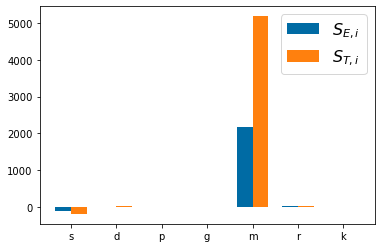

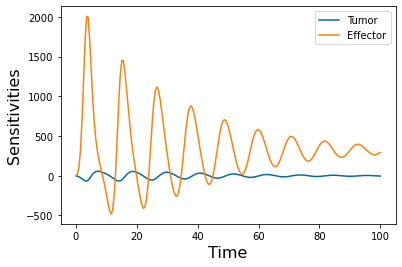

In [71]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  6 11:11:10 2022
Differential Sensitivity for the 
Tumor/Effector system
@author: cogan
"""

from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import numpy.matlib
from matplotlib import pyplot    # import plotting library
from scipy.integrate import solve_ivp
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible

pyplot.close('all')


# same as usual: define f and g, rhs returns the right hand side
# parameters are from the paper, beware the order though

def f(t,Y,params):
    E,T =Y
    s,d,p,g,m,r,k=params
    return s-d*E+p*E*T/(g+T)-m*E*T
def g(t,Y,params):
    E,T =Y
    s,d,p,g,m,r,k=params
    return r*T*(1-T/k)-E*T
def rhs(t,Y,params):
    E,T =Y
    s,d,p,g,m,r,k=params
    return [f(t,Y,params),g(t,Y,params)]

def rhs_diff(t,Y,params,j): # j will denote the parameter we are looking at
    e,t,s1,s2=Y
    dp=.1*params[j]#*params[j] #increment the parameter
    de=.001 #for e component of Jac
    dt=.001 #for t component of Jac
    params_p= np.array(params)
    params_m=np.array(params)
    params_p[j]=params[j]+dp
    params_m[j]=params[j]-dp
    f1 = (f(0,[e,t],params_p)-f(0,[e,t],params_m))/(2*dp)
    g1 = (g(0,[e,t],params_p)-g(0,[e,t],params_m))/(2*dp)
    f_e = (f(0,[e+de,t],params)-f(0,[e-de,t],params))/(2*de)
    f_t = (f(0,[e,t+dt],params)-f(0,[e,t-dt],params))/(2*dt)
    g_e = (g(0,[e+de,t],params)-g(0,[e-de,t],params))/(2*de)
    g_t = (g(0,[e,t+dt],params)-g(0,[e,t-dt],params))/(2*dt)
    #[f_e,f_t;g_e,g_t] is the Jac
    return [f(0,[e,t],params),g(0,[e,t],params),f1+f_e*s1+f_t*s2,g1+g_e*s1+g_t*s2] 
params=[ .1181,.3743,1.131,20.19,3.11*10**(-3),1.636,.5*10**3]
#T=Tumor cells
#E=effector cells 
tspan = np.linspace(0, 100.000, 200)
# =============================================================================
# There are many different sensitivies we can explore
#There are four different steady-states and 7 parameters
#Here SA_1, SA_2, SA_3, and SA_4 denote the sensitivities near
#different steady-states. Each for loop calculates the solution
#to the augmented system
# =============================================================================
SA_1=np.empty((7,2))
for j in np.arange(0,7):
    y_SA1 = solve_ivp(lambda t,Y: rhs_diff(t,Y,params,j),  [tspan[0],tspan[-1]],[.1,.10,0,0],method='LSODA',t_eval=tspan)
    SA_1[j,:]=y_SA1.y[-1,2:4]

SA_2=np.empty((7,2))
for j in np.arange(0,7):
    y_SA2 = solve_ivp(lambda t,Y: rhs_diff(t,Y,params,j),  [tspan[0],tspan[-1]],[.1,10,0,0],method='LSODA',t_eval=tspan)
    SA_2[j,:]=y_SA2.y[-1,2:4]

SA_3=np.empty((7,2))
for j in np.arange(0,7):
    y_SA3 = solve_ivp(lambda t,Y: rhs_diff(t,Y,params,j),  [tspan[0],tspan[-1]],[1, 280,0,0],method='LSODA',t_eval=tspan)
    SA_3[j,:]=y_SA3.y[-1,2:4]

SA_4=np.empty((7,2))
for j in np.arange(0,7):
    y_SA4 = solve_ivp(lambda t,Y: rhs_diff(t,Y,params,j),  [tspan[0],tspan[-1]],[0.001, 440 ,0,0],method='LSODA',t_eval=tspan)
    SA_4[j,:]=y_SA4.y[-1,2:4]
    
# =============================================================================
# These can be plotted using a bar plot to compare
#how the tumor and effector QoIs compare
# =============================================================================
p_names=('s', 'd', 'p', 'g', 'm', 'r', 'k')
bar_width = 0.35
pyplot.bar(np.arange(len(p_names))-bar_width/2,SA_4[:,0], bar_width)
pyplot.bar(np.arange(len(p_names))+bar_width/2,SA_4[:,1], bar_width)
pyplot.legend(['$S_{E,i}$', '$S_{T,i}$'],fontsize=16)
pyplot.xticks(np.arange(len(p_names)), p_names)

# =============================================================================
# To investigate how the direct sensitivities change in time for each parameter
#we can look at the solution to the system
# =============================================================================
pyplot.figure()
j=4 #which parameter
y_time = solve_ivp(lambda t,Y: rhs_diff(t,Y,params,j),  [tspan[0],tspan[-1]],[1, 10 ,0,0],method='LSODA',t_eval=tspan)
pyplot.plot(y_time.t, y_time.y[2]) #The sensitivity of the Effector to the jth paramter
pyplot.plot(y_time.t, y_time.y[3]) #The sensitivity of the Tumor to the jth paramter
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Sensitivities', fontsize=16)
pyplot.legend(['Tumor','Effector'])



## Viral model for acute infection: In this we use the time series and differentiate to estimate sensitivities. 

Text(0, 0.5, 'Sens. of $\\frac{\\partial V}{\\partial t}$ to $S_A$')

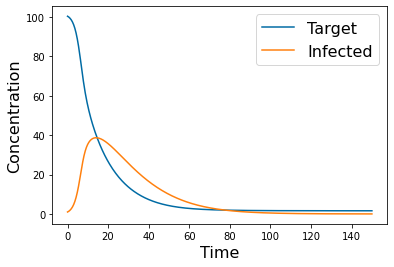

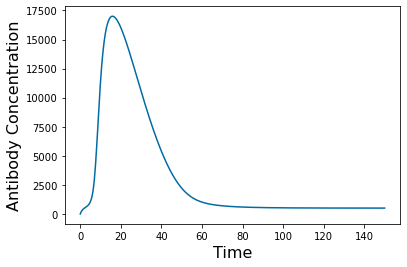

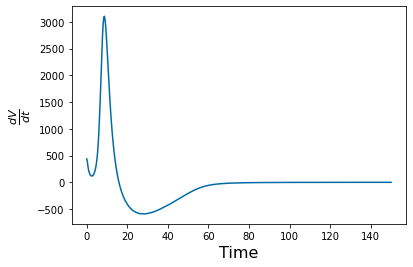

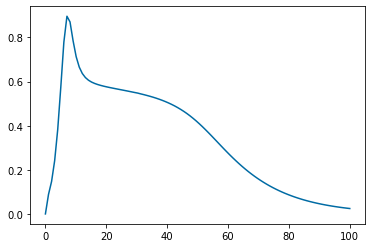

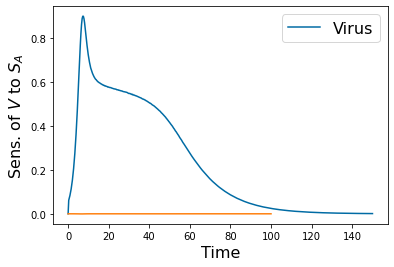

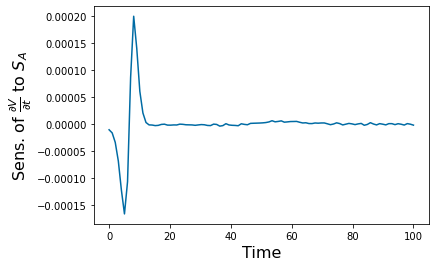

In [72]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 28 22:28:54 2018

@author: cogan

Acute infection model
y1=T: Target cells
y2=I: Infected cells
y3=V: Virus cells
y4=A: antibodies (signals)
params=[beta, delta, p, c, c_a, k, S_a, d]
"""
from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
from matplotlib import pyplot    # import plotting library
from scipy.integrate import solve_ivp
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible

pyplot.close('all')

# =============================================================================
# Define the RHS of ODEs
# This section considers the direct
# simulation. 
# 
# =============================================================================
def f1(t,Y,params):
    y1,y2,y3,y4=Y
    return -params[0]*y1*y3
def f2(t,Y,params):
    y1,y2,y3,y4=Y
    return params[0]*y1*y3-params[1]*y2
def f3(t,Y,params):
    y1,y2,y3,y4=Y
    return params[2]*y2-params[3]*y3-params[4]*y3*y4
def f4(t,Y,params):
    y1,y2,y3,y4=Y
    return params[5]*y3*y4+params[6]-params[7]*y4
def rhs(t,Y,params):
    y1,y2,y3,y4=Y
    return [f1(t,Y,params),f2(t,Y,params),f3(t,Y,params),f4(t,Y,params)]


# =============================================================================
# Differential SA
# For this we have augmented the 4 odes with the derivatives with respect to the
#  parameters. We have to indicate whch parameter -- here this is j
# Note that we could be smarter about generalizing our Jacobians rather than typing them by hand
# 
# =============================================================================


def rhs_diff(t,Y,params,j): # j will denote the parameter we are looking at
    y1,y2,y3,y4,s1,s2,s3,s4=Y
    dp=.1*params[j]#*params[j] #increment the parameter
    dy=.001 #for component of Jac
    params_p= np.array(params)
    params_m=np.array(params)
    params_p[j]=params[j]+dp
    params_m[j]=params[j]-dp
#f_p entries
    fp_1 = (f1(t,[y1,y2,y3,y4],params_p)-f1(t,[y1,y2,y3,y4],params_m))/(2*dp)
    fp_2 = (f2(t,[y1,y2,y3,y4],params_p)-f2(t,[y1,y2,y3,y4],params_m))/(2*dp)
    fp_3 = (f3(t,[y1,y2,y3,y4],params_p)-f3(t,[y1,y2,y3,y4],params_m))/(2*dp)
    fp_4 = (f4(t,[y1,y2,y3,y4],params_p)-f4(t,[y1,y2,y3,y4],params_m))/(2*dp)
#We could loop through to get the Jacobian but we are doing it explicitly
#First row
    f1_1 = (f1(t,[y1+dy,y2,y3,y4],params)-f1(t,[y1-dy,y2,y3,y4],params))/(2*dy)
    f1_2 = (f1(t,[y1,y2+dy,y3,y4],params)-f1(t,[y1,y2-dy,y3,y4],params))/(2*dy)
    f1_3 = (f1(t,[y1,y2,y3+dy,y4],params)-f1(t,[y1,y2,y3-dy,y4],params))/(2*dy)
    f1_4 = (f1(t,[y1,y2,y3,y4+dy],params)-f1(t,[y1,y2,y3,y4-dy],params))/(2*dy)
#Second row
    f2_1 = (f2(t,[y1+dy,y2,y3,y4],params)-f2(t,[y1-dy,y2,y3,y4],params))/(2*dy)
    f2_2 = (f2(t,[y1,y2+dy,y3,y4],params)-f2(t,[y1,y2-dy,y3,y4],params))/(2*dy)
    f2_3 = (f2(t,[y1,y2,y3+dy,y4],params)-f2(t,[y1,y2,y3-dy,y4],params))/(2*dy)
    f2_4 = (f2(t,[y1,y2,y3,y4+dy],params)-f2(t,[y1,y2,y3,y4-dy],params))/(2*dy)
#Third row
    f3_1 = (f3(t,[y1+dy,y2,y3,y4],params)-f3(t,[y1-dy,y2,y3,y4],params))/(2*dy)
    f3_2 = (f3(t,[y1,y2+dy,y3,y4],params)-f3(t,[y1,y2-dy,y3,y4],params))/(2*dy)
    f3_3 = (f3(t,[y1,y2,y3+dy,y4],params)-f3(t,[y1,y2,y3-dy,y4],params))/(2*dy)
    f3_4 = (f3(t,[y1,y2,y3,y4+dy],params)-f3(t,[y1,y2,y3,y4-dy],params))/(2*dy)
#Second row
    f4_1 = (f4(t,[y1+dy,y2,y3,y4],params)-f4(t,[y1-dy,y2,y3,y4],params))/(2*dy)
    f4_2 = (f4(t,[y1,y2+dy,y3,y4],params)-f4(t,[y1,y2-dy,y3,y4],params))/(2*dy)
    f4_3 = (f4(t,[y1,y2,y3+dy,y4],params)-f4(t,[y1,y2,y3-dy,y4],params))/(2*dy)
    f4_4 = (f4(t,[y1,y2,y3,y4+dy],params)-f4(t,[y1,y2,y3,y4-dy],params))/(2*dy)
    return [f1(t,[y1,y2,y3,y4],params),f2(t,[y1,y2,y3,y4],params),f3(t,[y1,y2,y3,y4],params),f4(t,[y1,y2,y3,y4],params),
            fp_1+f1_1*s1+f1_2*s2+f1_3*s3+f1_4*s4,
            fp_2+f2_1*s1+f2_2*s2+f2_3*s3+f2_4*s4,
            fp_3+f3_1*s1+f3_2*s2+f3_3*s3+f3_4*s4,
            fp_4+f4_1*s1+f4_2*s2+f4_3*s3+f4_4*s4]            

# =============================================================================
# Direct numerical simulation
# =============================================================================

params=[ .1181,.0743,1.131,20.19,3.11*10**(-3),1.636,.5*10**3,1]

tspan = np.linspace(0, 150, 500)

y0 = [100.35,1,0,0]
y_simulation = solve_ivp(lambda t,Y: rhs(t,Y,params),  [tspan[0],tspan[-1]],y0,method='RK45',t_eval=tspan)
 
pyplot.figure(1)
pyplot.plot(tspan,y_simulation.y[0])
pyplot.plot(tspan,y_simulation.y[1])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Concentration', fontsize=16)
pyplot.legend(['Target','Infected'], fontsize=16)

pyplot.figure(2)
pyplot.plot(tspan,y_simulation.y[2])
pyplot.legend(['Virus'], fontsize=16)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Viral Concentration', fontsize=16)


pyplot.figure(3)
pyplot.plot(tspan,y_simulation.y[3])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Antibody Concentration', fontsize=16)


#Post-processing to estimate derivative using the gradient operator
pyplot.figure(4)
gradient_v=np.gradient(y_simulation.y[3],(tspan[2]-tspan[1]));
pyplot.plot(tspan, gradient_v)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel(r'$\frac{dV}{dt}$', fontsize=16)


# =============================================================================
# Feature Sensitivity using post-processing
# =============================================================================
tspan = np.linspace(0, 100, 100)
y_SA_feature = solve_ivp(lambda t,Y: rhs_diff(t,Y,params,6),  [tspan[0],tspan[-1]],[100.35,1,0,0,0,0,0,0],method='RK45',t_eval=tspan)


pyplot.figure(5)
pyplot.plot(tspan,y_SA_feature.y[2])
pyplot.figure(2)
pyplot.plot(tspan,y_SA_feature.y[6])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Sens. of $V$ to $S_A$', fontsize=16)


gradient_v_feature=np.gradient(y_SA_feature.y[6],(tspan[2]-tspan[1]));

pyplot.figure(6)
pyplot.plot(tspan, gradient_v_feature)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Sens. of ' r'$\frac{\partial V}{\partial t}$ to $S_A$', fontsize=16)







## Tuberculosis Model:

([<matplotlib.axis.XTick at 0x7fcf39665220>,
 [Text(0, 0, '$r$'),
  Text(1, 0, '$g$'),
  Text(2, 0, '$h$'),
  Text(3, 0, '$f$'),
  Text(4, 0, '$a$'),
  Text(5, 0, '$s$'),
  Text(6, 0, '$k$')])

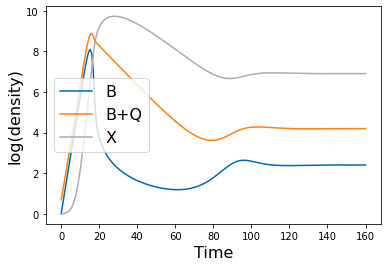

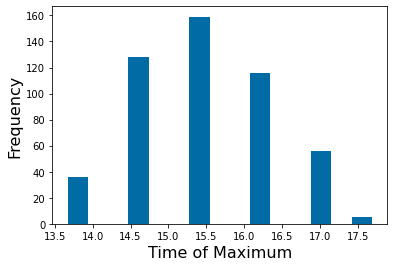

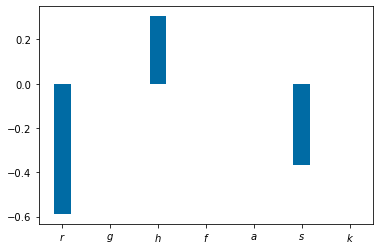

In [73]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 31 22:28:06 2021
TB Model
@author: cogan
B= Free bacteria
Q = Dormant Bacteria
X= Immune response
r,g,h,f,f,g,a,s,k,d=params
"""

from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
from matplotlib import pyplot    # import plotting library
from scipy.integrate import solve_ivp
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible


#Define the RHS, FIrst for Lotka-Volterra
def B_rhs(t,Y,params):
    B,Q,X=Y
    r,h,f,g,a,s,k,d=params
    return r*B+g*Q-(h*B*X+f*B)
def Q_rhs(t,Y,params):
    B,Q,X=Y
    r,h,f,g,a,s,k,d=params
    return f*B-g*Q
def X_rhs(t,Y,params):
    B,Q,X=Y
    r,h,f,g,a,s,k,d=params
    return a+s*X*(B/(k+B))-d*X
                  
def rhs(t,Y,params):
    B,Q,X=Y
    r,h,f,g,a,s,k,d=params
    return [B_rhs(t,Y,params),Q_rhs(t,Y,params),X_rhs(t,Y,params)]

params=[1,.001,.5,.1,.1,1,100,.1]

tspan = np.linspace(0, 160, 200)
y0 = [1,1,1]
y_solution = solve_ivp(lambda t,Y: rhs(t,Y,params),  [tspan[0],tspan[-1]],y0,method='RK45',t_eval=tspan)
y_plot=y_solution.y  #take the y values

pyplot.figure()
pyplot.plot(tspan, np.log(y_plot[0]))
pyplot.plot(tspan, np.log(y_plot[0]+y_plot[1]))
pyplot.plot(tspan, np.log(y_plot[2]))
pyplot.legend(['B','B+Q','X'],fontsize=16)
pyplot.xlabel('Time',fontsize=16)
pyplot.ylabel('log(density)',fontsize=16)
#pyplot.savefig('tb.png')

##########################################
#function to calculate the timeof maximum
######################################


Num_samples=500
params_max=np.multiply(params,1.1)
params_min=np.multiply(params,.9)
time_max=np.empty(shape=Num_samples)
for s in np.arange(0,Num_samples):   
    for k in np.arange(0,6): 
        params[k]=np.random.uniform(params_min[k],params_max[k], size=None)
    y_solution = solve_ivp(lambda t,Y: rhs(t,Y,params),  [tspan[0],tspan[-1]],y0,method='RK45',t_eval=tspan)
    time_max[s]=tspan[np.argmax(y_solution.y[0])]
pyplot.figure()

pyplot.hist(time_max,15)
pyplot.xlabel('Time of Maximum',fontsize=16)
pyplot.ylabel('Frequency',fontsize=16)
#pyplot.savefig('time_max_hist.png')

    

##################
#Local Sensitivity
######################################
Num_samples=100
params_max=np.multiply(params,1.2)
params_min=np.multiply(params,.9)
time_max=np.empty(shape=Num_samples)
s=np.empty(shape=7) #place holder for der. of QoI
r=np.empty(shape=7) #place holder for params

time_max_min=np.empty(shape=7)
time_max_max=np.empty(shape=7)
params_small=[1,.001,.5,.1,.1,1,100,.1]
params_large=[1,.001,.5,.1,.1,1,100,.1]

for k in np.arange(0,7): 
    params_small[k]=params_min[k]
    y_solution_min = solve_ivp(lambda t,Y: rhs(t,Y,params_small),  [tspan[0],tspan[-1]],y0,method='RK45',t_eval=tspan)
    time_max_min[k]=tspan[np.argmax(y_solution_min.y[0])]
    params_large[k]=params_max[k]
    y_solution_max = solve_ivp(lambda t,Y: rhs(t,Y,params_large),  [tspan[0],tspan[-1]],y0,method='RK45',t_eval=tspan)
    time_max_max[k]=tspan[np.argmax(y_solution_max.y[0])]
    s[k]=(time_max_max[k]-time_max_min[k])/tspan[np.argmax(y_solution_max.y[0])]
    r[k]=(params_large[k]-params_small[k])/params[k]
    params=[1,.001,.5,.1,.1,1,100,.1]
    params_small=[1,.001,.5,.1,.1,1,100,.1]
    params_large=[1,.001,.5,.1,.1,1,100,.1]
pyplot.figure()
bar_width=.35
p_names=('$r$', '$g$', '$h$', '$f$', '$a$','$s$','$k$' )
pyplot.bar(np.arange(len(p_names)),s/r, bar_width)
pyplot.xticks(np.arange(len(p_names)), p_names)
#pyplot.savefig('sa_bar.png')

# Chapter 6: Between-host Disease Models

## SI with vital dynamics

Text(0, 0.5, 'Population')

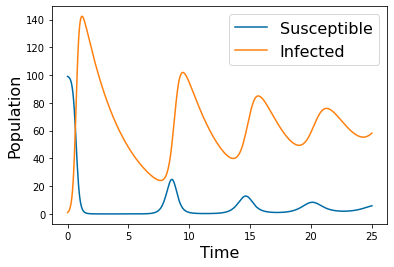

In [74]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 16 07:30:47 2022
Solves the SI model with vital dynamics. Uses Spider plot
as the SI indice.
@author: cogan
"""
from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
from matplotlib import pyplot    # import plotting library
from scipy.integrate import solve_ivp
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible

#Define the RHS of ODEs
def f1(t,Y,params):
    S,I=Y
    r, kappa, k, delta, IC1, IC2 = params
    return -k*S*I+r*S*(kappa-S)
def f2(t,Y,params):
    S,I=Y
    r, kappa, k, delta , IC1, IC2= params
    return k*S*I-delta*I
def rhs(t,Y,params):
    S,I=Y
    r, kappa, k, delta , IC1, IC2= params
    return [f1(t,Y,params),f2(t,Y,params)]
params_names=( ['$r$', '$\kappa$', '$k$', '$\delta$', '$S_0$', '$I_0$'])

params=np.array([.05, 100, .075, .3,99,1])
tspan = np.linspace(0, 25, 500)
y_solution= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [99,1], method='RK45',t_eval=tspan)
pyplot.plot(tspan, y_solution.y[0])
pyplot.plot(tspan, y_solution.y[1])
pyplot.legend(['Susceptible', 'Infected'], fontsize=16)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Population', fontsize=16)
#pyplot.savefig('SI_dyn.png')


## Spider Plots for SI

([<matplotlib.axis.XTick at 0x7fcf90dfea60>,
 [Text(0, 0, '-50%'),
  Text(1, 0, '-40%'),
  Text(2, 0, '-30%'),
  Text(3, 0, '-20%'),
  Text(4, 0, '-10%'),
  Text(5, 0, '0%'),
  Text(6, 0, '10%'),
  Text(7, 0, '20%'),
  Text(8, 0, '30%'),
  Text(9, 0, '40%'),
  Text(10, 0, '50%')])

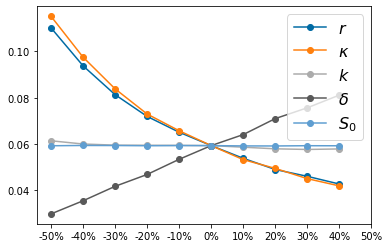

In [75]:
tspan = np.linspace(0, 500, 1000)

params=[.05, 100, .075, .3,99,1] #augment parameters for initial conditions
Num_samples=5
QoI=np.zeros([2*Num_samples,5])
for k in np.arange(0,5): 
    for i in np.arange(0,2*Num_samples):
        params[k]=.5*params[k]+i*.1*params[k]
        y0=[params[-2],params[-1]]
        y_solution = solve_ivp(lambda t,Y: rhs(t,Y,params),  [tspan[0],tspan[-1]],y0,method='RK45',t_eval=tspan)
        QoI[i,k]=y_solution.y[0][-1]/(y_solution.y[0][-1]+y_solution.y[1][-1])
        params=[.05, 100, .075, .3,99,1]
pyplot.figure()
pyplot.plot(QoI,'-o')
pyplot.legend(params_names, fontsize=16)
pyplot.xticks(np.arange(0,2*Num_samples+1), ['-50%', '-40%', '-30%', '-20%', '-10%', '0%', '10%', '20%', '30%', '40%', '50%'])

## SIR Model

### Dynamics

Text(0, 0.5, 'Population')

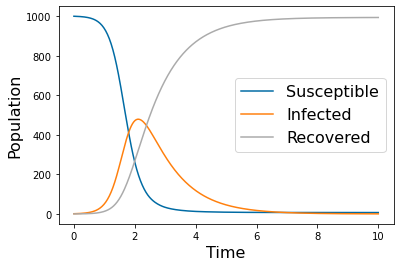

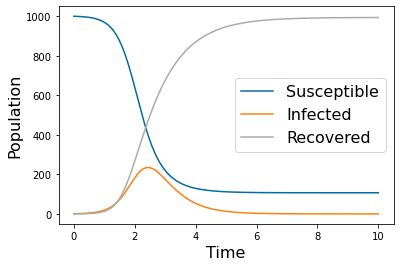

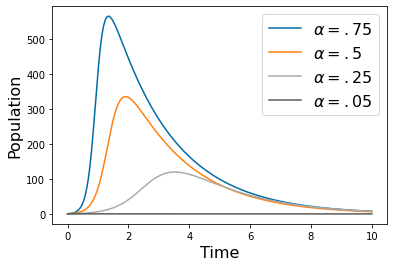

In [76]:
"""
Created on Mon Jan  3 17:42:39 2022
Model of SIR
@author: Cogan
"""


from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import odeint
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
import random
pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible



#Define the RHS of ODEs
def f1(t,Y,params):
    S,I,R=Y
    k, gamma = params
    return -k*S*I
def f2(t,Y,params):
    S,I,R=Y
    k, gamma = params
    return k*S*I-gamma*I
def f3(t,Y,params):
    S,I,R=Y
    k, gamma = params
    return gamma*I
def rhs(t,Y,params):
    S,I,R=Y
    k, gamma = params
    return [f1(t,Y,params),f2(t,Y,params),f3(t,Y,params)]
# same as usual: define f and g, rhs returns the right hand side
# parameters are from the paper, beware the order though
p_names=( 'k','gamma')
params=np.array([ 0.005, 1])
N=1000
tspan = np.linspace(0, 10, 500)
yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [N,1,0], method='RK45',t_eval=tspan)
pyplot.figure(1)

pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.plot(tspan,yp.y[2])
pyplot.legend(['Susceptible','Infected','Recovered'], fontsize=16)
pyplot.legend(['Susceptible','Infected','Recovered'], fontsize=16)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Population', fontsize=16)
#pyplot.savefig('SIR_high.png')

pyplot.figure(2)
params1=np.array([ 0.005,2])
yp1= solve_ivp(lambda t,Y: rhs(t,Y,params1), [tspan[0],tspan[-1]], [N,1,0], method='LSODA',t_eval=tspan)
pyplot.plot(tspan,yp1.y[0])
pyplot.plot(tspan,yp1.y[1])
pyplot.plot(tspan,yp.y[2])
pyplot.legend(['Susceptible','Infected','Recovered'], fontsize=16)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Population', fontsize=16)
#pyplot.savefig('SIR_low.png')


###GENERATE alpha plot
pyplot.figure(3)
params1=np.array([ 0.01, 0.5])
yp2= solve_ivp(lambda t,Y: rhs(t,Y,params1), [tspan[0],tspan[-1]], [.75*N,1,0], method='RK45',t_eval=tspan)
yp3= solve_ivp(lambda t,Y: rhs(t,Y,params1), [tspan[0],tspan[-1]], [.5*N,1,0], method='RK45',t_eval=tspan)
yp4= solve_ivp(lambda t,Y: rhs(t,Y,params1), [tspan[0],tspan[-1]], [.25*N,1,0], method='RK45',t_eval=tspan)
yp5= solve_ivp(lambda t,Y: rhs(t,Y,params1), [tspan[0],tspan[-1]], [.05*N,1,0], method='RK45',t_eval=tspan)

pyplot.plot(tspan,yp2.y[1])
pyplot.plot(tspan,yp3.y[1])
pyplot.plot(tspan,yp4.y[1])
pyplot.plot(tspan,yp5.y[1])

pyplot.legend([r'$\alpha = .75$',r'$\alpha = .5$',r'$\alpha = .25$',r'$\alpha = .05$'], fontsize=16)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Population', fontsize=16)
#pyplot.savefig('SIR_alpha.png')



### Tornado Plot

(0.0075, 0.0)

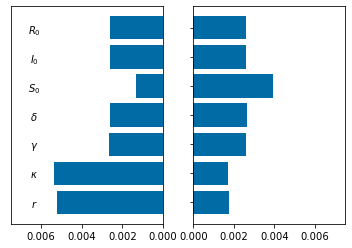

In [77]:

###############################################################################
#Tornado plot
#we need low and high values of parameters with results Qoi_low and QoI_high
###############################################################################




#Define the RHS of ODEs for the tornado plots. We have expanded the number of parameters
def f1_t(t,Y,params):
    S,I,R=Y
    r, kappa, k, gamma, delta, IC_S, IC_I, IC_R = params
    return r*S*(kappa-S)-k*S*I
def f2_t(t,Y,params):
    S,I,R=Y
    r, kappa, k, gamma, delta , IC_S, IC_I, IC_R= params
    return k*S*I-gamma*I-delta*I
def f3_t(t,Y,params):
    S,I,R=Y
    r, kappa, k, gamma, delta , IC_S, IC_I, IC_R= params
    return gamma*I
def rhs_t(t,Y,params):
    S,I,R=Y
    r, kappa, k, gamma, delta , IC_S, IC_I, IC_R= params
    return [f1_t(t,Y,params),f2_t(t,Y,params),f3_t(t,Y,params)]


tspan = np.linspace(0, 50, 1000)

params_t=[.1, 2000, .01, .01, .5, 1000-10,10,0] #augment parameters for initial conditions
params_min_t=[.1, 2000, .01, .01, .5, 1000-10,10,0]
params_max_t=[.1, 2000, .01, .01, .5, 1000-10,10,0]
QoI_min=np.zeros([7])
QoI_max=np.zeros([7])

for k in np.arange(0,7):
    params_min_t[k]=.5*params_min_t[k]
    params_max_t[k]=1.5*params_max_t[k]
    y_solution_min_t = solve_ivp(lambda t,Y: rhs_t(t,Y,params_min_t),  [tspan[0],tspan[-1]],[params_t[-3],params_t[-2], params_t[-1]],method='RK45',t_eval=tspan)
    y_solution_max_t = solve_ivp(lambda t,Y: rhs_t(t,Y,params_max_t),  [tspan[0],tspan[-1]],[params_t[-3],params_t[-2], params_t[-1]],method='RK45',t_eval=tspan)     
    QoI_min[k]=y_solution_min_t.y[0][-1]/(y_solution_min_t.y[0][-1]+y_solution_min_t.y[1][-1])
    QoI_max[k]=y_solution_max_t.y[0][-1]/(y_solution_max_t.y[0][-1]+y_solution_max_t.y[1][-1])
    params_t=[.1, 2000, .01, .01, .5, 1000-10,10,0] #augment parameters for initial conditions
    params_min_t=[.1, 2000, .01, .01, .5, 1000-10,10,0]
    params_max_t=[.1, 2000, .01, .01, .5, 1000-10,10,0]


#Make the tornado plots
pos_label = (['$r$','$\kappa$','$\gamma$','$\delta$','$S_0$','$I_0$','$R_0$'])#
pos=np.arange(7) + .5

fig, (ax_left, ax_right) = pyplot.subplots(ncols=2)
ax_left.barh(pos, QoI_min, align='center')
ax_left.set_yticks([])
ax_left.invert_xaxis()
ax_right.barh(pos, QoI_max, align='center')
ax_right.set_yticks(pos)
ax_right.set_yticklabels(pos_label, ha='center', x=-1)
ax_right.set_xlim((0,.0075))
ax_left.set_xlim((0.0075,0))
#pyplot.savefig('SIR_tornado.png')



## SIRS model

###  Dynamics With Waning Antigens

Text(0, 0.5, 'Population')

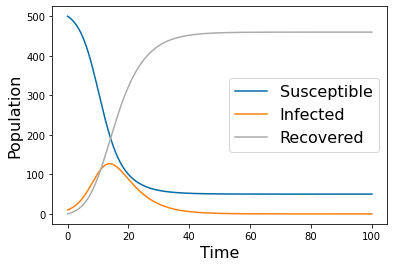

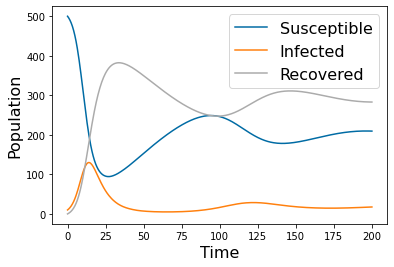

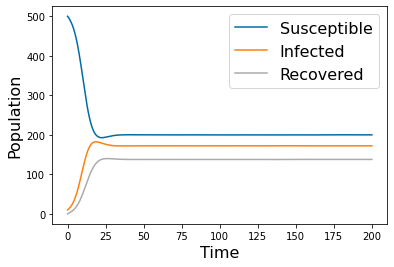

In [78]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 26 11:34:10 2021
SIRS model with cobwebbing
@author: cogan
"""



from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp
pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible


#Define the RHS of ODEs
def f1(t,Y,params):
    S,I,R=Y
    k, alpha , gamma, S0, I0, R0= params
    return -k*S*I+alpha*R
def f2(t,Y,params):
    S,I,R=Y
    k, alpha , gamma, S0, I0, R0= params
    return k*S*I-gamma*I
def f3(t,Y,params):
    S,I,R=Y
    k, alpha , gamma, S0, I0, R0= params
    return gamma*I-alpha*R
def rhs(t,Y,params):
    S,I,R=Y
    k, alpha , gamma, S0, I0, R0= params
    return [f1(t,Y,params),f2(t,Y,params),f3(t,Y,params)]
p_names=( r'$k$',r'$\alpha$', r'$\gamma$', r'$S_0$',r'$I_0$',r'$R_0$' )

#With no reversion from recovered to susceptible  (alpha=0) there is only one wave
params=np.array([ 0.001, 0, .2, 500, 10, 0])
tspan = np.linspace(0, 100, 500)
yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [params[-3],params[-2],params[-1]], method='RK45',t_eval=tspan)
pyplot.figure(1)

pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.plot(tspan,yp.y[2])
pyplot.legend(['Susceptible','Infected','Recovered'], fontsize=16)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Population', fontsize=16)
#pyplot.savefig('SIRS_0.png')


#Nonzero alpha leades to oscillating solutions
params=np.array([ 0.001, 0.0125, .2, 500, 10, 0])
tspan = np.linspace(0, 200, 500)
yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [params[-3],params[-2],params[-1]], method='RK45',t_eval=tspan)
pyplot.figure(2)

pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.plot(tspan,yp.y[2])
pyplot.legend(['Susceptible','Infected','Recovered'], fontsize=16)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Population', fontsize=16)
#pyplot.savefig('SIRS_1.png')

#With a faster rate of waning antigens, the disease rapidly becomes endemic
params=np.array([ 0.001, 0.25, .2, 500, 10, 0])
tspan = np.linspace(0, 200, 500)
yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [params[-3],params[-2],params[-1]], method='RK45',t_eval=tspan)
pyplot.figure(3)


pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.plot(tspan,yp.y[2])
pyplot.legend(['Susceptible','Infected','Recovered'], fontsize=16)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Population', fontsize=16)
#pyplot.savefig('SIRS_2.png')



### Cobwebbing:

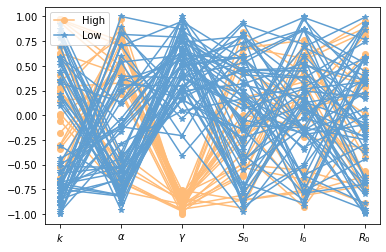

In [79]:

# =============================================================================
# Set-up cobwebbing 
# =============================================================================

# =============================================================================
# set-up samples
# =============================================================================
params=np.array([ 0.001, 0.01, .2, 500, 10, 1])
tspan = np.linspace(0, 50, 500)
Num_samples=200
param_level=np.linspace(-1, 1, Num_samples) #this iterates the scaling of the parameter samples
parameter_list=np.zeros([Num_samples,7])
# =============================================================================
# Looop through each parameter and each value -- arrange in a matrix, use this
# to generate samples.  Note for loops are pretty fast in 
# python, but typically not in Matlab. We could make this more efficient. 
# =============================================================================
for k in np.arange(6):
    for i in np.arange(Num_samples):
        parameter_list[i,k]=(1+np.random.choice(param_level,1))*params[k]
        
for i in np.arange(Num_samples):       
    yp= solve_ivp(lambda t,Y: rhs(t,Y,parameter_list[i,0:6]), [tspan[0],tspan[-1]], [params[-3],params[-2],params[-1]], method='RK45',t_eval=tspan)
    parameter_list[i,-1]=yp.y[1][-1]
# =============================================================================
# Find all QoI (here it is the infected population at time 200) larger than a threshold
# (here 150) and sort samples into large and small infected populations
# =============================================================================
Large=np.argwhere(parameter_list[:,-1]>150) #find all QoI>
Small=np.argwhere(parameter_list[:,-1]<1) #find all QoI>
#scale parameters
parameter_list_scaled=np.zeros([Num_samples,7])
scaled=np.empty(6)

# =============================================================================
# Scale parameters between -1 and 1
# =============================================================================
for i in np.arange(Num_samples):
    np.divide(parameter_list[i,0:6], np.append(params[0:5],1), scaled)
    parameter_list_scaled[i,0:6]=scaled-1
    
# =============================================================================
#     Generate Spider plot
# =============================================================================
pyplot.figure(4)
for i in np.arange(len(Large)-1):
    pyplot.plot(parameter_list_scaled[Large[i],0:6][0],'o-',color='#FFBC79')

pyplot.plot(parameter_list_scaled[Large[-1],0:6][0],'o-',color='#FFBC79',label='High')
   

for i in np.arange(len(Small)-1):
    pyplot.plot(parameter_list_scaled[Small[i],0:6][0],'*-',color='#5F9ED1')

pyplot.plot(parameter_list_scaled[Small[-1],0:6][0],'*-',color='#5F9ED1',label='Low')
    
pyplot.xticks(ticks=np.arange(6), labels=p_names)
pyplot.legend(loc='best')
#pyplot.savefig('SIRS_cobweb.png')         



# Microbiology

## Chemostat:

###  Steady-state

In [80]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 26 11:34:10 2021
Chemostat model : Steady-state
@author: cogan
"""


#### 
from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import scipy as scipy

pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible


# =============================================================================
# Define the RHS of ODEs for nutrient (N) and bacteria (B)
# =============================================================================
def f1(Y,params):
    N,B=Y
    N0, F, Yield, mu, K_n = params
    return N0*F-1/Yield*mu*N/(K_n+N)*B-F*N
def f2(Y,params):
    N,B=Y
    N0, F, Yield, mu, K_n = params
    return mu*N/(K_n+N)*B-F*B
def rhs(Y,params):
    N,B=Y
    N0, F, Yield, mu, K_n = params
    return [f1(Y,params),f2(Y,params)]
N_0=1
B_0=.05
params=[1, .05, .25, .5, 1]
fp = []
solution1=fsolve(lambda Y: rhs(Y,params), [.1, .1])
print('Fixed points = ',solution1)
# =============================================================================
# A discrete estimate of the Jacobian using centered difference. The user should
#consider this with care.
# =============================================================================
def Myjac(Y,params,epsilon):
    N,B=Y
    f_N = (f1([N+epsilon,B],params)-f1([N-epsilon,B],params))/epsilon/2
    f_B = (f1([N,B+epsilon],params)-f1([N,B-epsilon],params))/epsilon/2
    g_N = (f2([N+epsilon,B],params)-f2([N-epsilon,B],params))/epsilon/2
    g_B = (f2([N,B+epsilon],params)-f2([N,B-epsilon],params))/epsilon/2
    J = np.array([[f_N,f_B],[g_N,g_B]])
    return J

J=Myjac(np.array([solution1[0],solution1[1]]),params,.001)
print('Jacobian is', J)

# =============================================================================
# Determine the eigenvalues
# =============================================================================
w,v= np.linalg.eig(J)
print('Eigenvalues are', w)
tspan = np.linspace(0, 200, 4000)



Fixed points =  [0.11111111 0.22222222]
Jacobian is [[-0.41000029 -0.2       ]
 [ 0.09000007  0.        ]]
Eigenvalues are [-0.36000029 -0.05      ]


### Dynamics

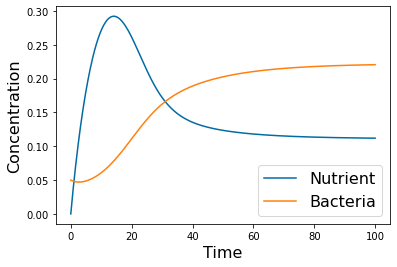

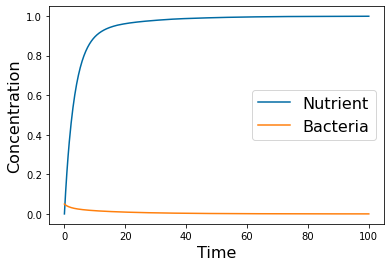

In [81]:
N_0=0
B_0=.05
# =============================================================================
# Coexistence example
# =============================================================================
params=[1, .05, .25, .5, 1]
tspan = np.linspace(0, 100, 500)
yp= solve_ivp(lambda t,Y: rhs(Y,params), [tspan[0],tspan[-1]], [N_0, B_0], method='LSODA',t_eval=tspan)
pyplot.figure
pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Concentration', fontsize=16)
pyplot.legend(['Nutrient', 'Bacteria'], fontsize=16)

# =============================================================================
# Washout example
# =============================================================================
params=[1, .3, .25, .5, 1]
tspan = np.linspace(0, 100, 500)
yp= solve_ivp(lambda t,Y: rhs(Y,params), [tspan[0],tspan[-1]], [N_0, B_0], method='LSODA',t_eval=tspan)
pyplot.figure()
pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Concentration', fontsize=16)
pyplot.legend(['Nutrient', 'Bacteria'], fontsize=16)
#pyplot.savefig('Chemo_wash.png')



### Pearsons Correlation

In [100]:
#==============================================================================
# for Latin Hypercube Sampling
#==============================================================================


from scipy.stats import qmc 

# =============================================================================
# Pearsons correlation coefficient
# =============================================================================
Num_samples=50
total_bacteria=np.zeros(Num_samples)

# =============================================================================
# Note that qmc is defined on the unit interval
# =============================================================================
sampler = qmc.LatinHypercube(d=5) #Define the sampling method and parameter dimension
parameters = sampler.random(n=Num_samples)      #number of samples to take
# =============================================================================
# Scale the samples into the correct parameter scale
# =============================================================================
l_bounds = np.multiply(params,.95)
u_bounds = np.multiply(params,1.05)
parameters_scaled=qmc.scale(parameters, l_bounds, u_bounds)
for i in np.arange(Num_samples):
    params_i=parameters_scaled[i,:]
    tspan = np.linspace(0, 100, 500)
    yp = solve_ivp(lambda t,Y: rhs(Y,params_i), [tspan[0],tspan[-1]], [N_0, B_0], method='RK45',t_eval=tspan)

# =============================================================================
# trapz is a relatively standard  implementation of the 
# trapezoidal rule for integration. QoI is total bacterial count
# =============================================================================
    total_bacteria[i]=np.trapz(yp.y[1],tspan)         
cc=np.zeros([2,5])
for j in np.arange(5):
    #Calling scipy pearsons
    cc[:,j]=scipy.stats.pearsonr(parameters_scaled[:,j], total_bacteria) 

# =============================================================================
# Increase the number of samples
# =============================================================================
Num_samples=500
total_bacteria=np.zeros(Num_samples)
sampler = qmc.LatinHypercube(d=5) 
parameters = sampler.random(n=Num_samples)      
# =============================================================================
# Scale the samples into the correct parameter scale
# =============================================================================
l_bounds = np.multiply(params,.95)
u_bounds = np.multiply(params,1.05)
parameters_scaled=qmc.scale(parameters, l_bounds, u_bounds)
for i in np.arange(Num_samples):
    params_i=parameters_scaled[i,:]
    tspan = np.linspace(0, 100, 500)
    yp_500= solve_ivp(lambda t,Y: rhs(Y,params_i), [tspan[0],tspan[-1]], [N_0, B_0], method='RK45',t_eval=tspan)
    total_bacteria[i]=np.trapz(yp_500.y[1],tspan)          
cc_500=np.zeros([2,5])
for j in np.arange(5):
    cc_500[:,j]=scipy.stats.pearsonr(parameters_scaled[:,j], total_bacteria) 


# =============================================================================
# Even more samples
# =============================================================================
Num_samples=1500
total_bacteria=np.zeros(Num_samples)
#Note that qmc is on the unit interval
sampler = qmc.LatinHypercube(d=5) #Define the sampling method and parameter dimension
parameters = sampler.random(n=Num_samples)      #number of samples to take
#Scale the samples into the correct parameter scale
l_bounds = np.multiply(params,.95)
u_bounds = np.multiply(params,1.05)
parameters_scaled=qmc.scale(parameters, l_bounds, u_bounds)
for i in np.arange(Num_samples):
    params_i=parameters_scaled[i,:]
    tspan = np.linspace(0, 100, 500)
    yp_1500= solve_ivp(lambda t,Y: rhs(Y,params_i), [tspan[0],tspan[-1]], [N_0, B_0], method='LSODA',t_eval=tspan)
    total_bacteria[i]=np.trapz(yp_1500.y[1],tspan)          #trapz is a relatively standard  implementation of the trapezoidal rule for integration
cc_1500=np.zeros([2,5])
for j in np.arange(5):
    cc_1500[:,j]=scipy.stats.pearsonr(parameters_scaled[:,j], total_bacteria) 


pyplot.figure()
bar_width=.35
p_names=('$N_0$', '$F$', '$Y$', r'$\mu$', '$K_n$' )
pyplot.bar(np.arange(len(p_names))-1*bar_width,cc[0], bar_width)
pyplot.bar(np.arange(len(p_names)),cc_500[0], bar_width)
pyplot.bar(np.arange(len(p_names))+1*bar_width,cc_1500[0], bar_width)
pyplot.xticks(np.arange(len(p_names)), p_names)
pyplot.legend(['50 Samples', '500 Samples','1500 Samples'])

#pyplot.savefig('cc_chemo.png')

# =============================================================================
# Don't forget to check linearity
# =============================================================================
pyplot.figure()

pyplot.scatter(parameters_scaled[:,0],total_bacteria)
pyplot.xlabel('$N_0$', fontsize=16)
pyplot.ylabel('QoI'   , fontsize=16)
#pyplot.savefig('N_0_scatter.png')

pyplot.figure()

pyplot.scatter(parameters_scaled[:,1],total_bacteria)
pyplot.xlabel('$F$', fontsize=16)
pyplot.ylabel('QoI'   , fontsize=16)
#pyplot.savefig('F_scatter.png')

pyplot.figure()


pyplot.scatter(parameters_scaled[:,2],total_bacteria)
pyplot.ylabel('$N_0$', fontsize=16)
pyplot.xlabel('QoI'   , fontsize=16)
#pyplot.savefig('Y_scatter.png')

pyplot.figure()


pyplot.scatter(parameters_scaled[:,3],total_bacteria)
pyplot.xlabel(r'$\mu$', fontsize=16)
pyplot.ylabel('QoI'   , fontsize=16)
#pyplot.savefig('muscatter.png')

pyplot.figure()


pyplot.scatter(parameters_scaled[:,4],total_bacteria)
pyplot.xlabel('$K_n$', fontsize=16)
pyplot.ylabel('QoI'   , fontsize=16)
#pyplot.savefig('K_scatter.png')




ValueError: Sample dimension is different than bounds dimension

## Freter Model

### Dynamics

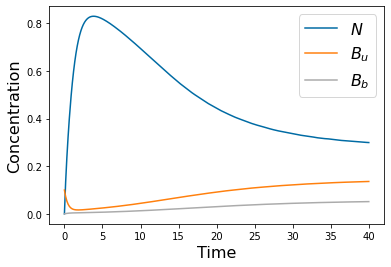

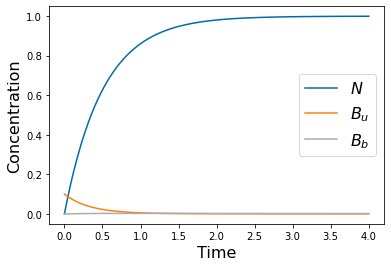

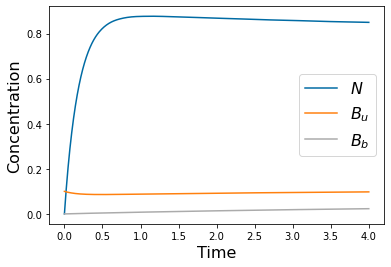

In [83]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 26 11:34:10 2021
Freter model 
We are using pyDOE to do some of the sampling. 
This may require the command
'pip install --upgrade pyDOE'
@author: cogan
"""



from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp
import scipy as scipy
pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible


# =============================================================================
# Define the RHS of ODEs
# =============================================================================
def f1(t,Y,params):
    N, Bu, Bb=Y
    N0, Yield, mu, K_n, F, B0, alpha, K_alpha, V, A, beta, K_b = params
    return N0*F-1/Yield*mu*N/(K_n+N)*(Bu+Bb)-F*N
def f2(t,Y,params):
    N, Bu, Bb=Y
    N0, Yield, mu, K_n, F, B0, alpha, K_alpha, V, A, beta, K_b = params
    return B0*F-alpha/(K_alpha+Bb)*Bu+V/A*beta*Bb \
            -F*Bb +(1-Bb/(K_b+Bb))*1/Yield*mu*N/(K_n+N)*Bb-F*Bu
def f3(t,Y,params):
    N, Bu, Bb=Y
    N0, Yield, mu, K_n, F, B0, alpha, K_alpha, V, A, beta, K_b = params
    return A/V*alpha/(K_alpha+Bb)*Bu-beta*Bb \
        +A/V*Bb/(K_b+Bb)*1/Yield*mu*N/(K_n+N)*Bb
def rhs(t,Y,params):
    N, Bu, Bb=Y
    N0, Yield, mu, K_n, F, B0, alpha, K_alpha, V, A, beta, K_b = params
    return [f1(t,Y,params),f2(t,Y,params),f3(t,Y,params)]
Params_names=['$N_0$', '$Y$', '$\mu$', '$K_n$', '$F$', '$B_0$', r'$\alpha$', r'$k_\alpha$', '$V$', '$A$', r'$\beta$', '$K_b$'] 
# =============================================================================
# Coexistence
# =============================================================================
params=[1, .1, 1, .5, 1, 0*.1, .1, .1, 10, 1, .2, .5]
tspan = np.linspace(0, 40, 500)
N_init=0
Bu_init=.1
Bb_init=0
yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [N_init, Bu_init, Bb_init], method='RK45',t_eval=tspan)
pyplot.figure()
pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.plot(tspan,yp.y[2])

pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Concentration', fontsize=16)
pyplot.legend(['$N$', '$B_u$', '$B_b$'], fontsize=16)
#pyplot.savefig('Freter_coexist.png')


# =============================================================================
# Washout
# =============================================================================
params=[1, .1, .1, .5, 2, 0*.1, .1, .1, 10, 1, .2, .5]
tspan = np.linspace(0, 4, 500)
N_init=0
Bu_init=.1
Bb_init=0
yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [N_init, Bu_init, Bb_init], method='RK45',t_eval=tspan)
pyplot.figure()
pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.plot(tspan,yp.y[2])

pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Concentration', fontsize=16)
pyplot.legend(['$N$', '$B_u$', '$B_b$'], fontsize=16)
#pyplot.savefig('Freter_wash.png')


# =============================================================================
# fast
# =============================================================================
params=[1, .1, 1, .5, 5, .1, .1, .1, 10, 1, .2, .5]
tspan = np.linspace(0, 4, 500)
N_init=0
Bu_init=.1
Bb_init=0
yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [N_init, Bu_init, Bb_init], method='RK45',t_eval=tspan)
pyplot.figure()
pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.plot(tspan,yp.y[2])

pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Concentration', fontsize=16)
pyplot.legend(['$N$', '$B_u$', '$B_b$'], fontsize=16)
#pyplot.savefig('Freter_fast.png')


### Spearman Correlation Coefficient using PyDOE for sampling over a normal distribution.

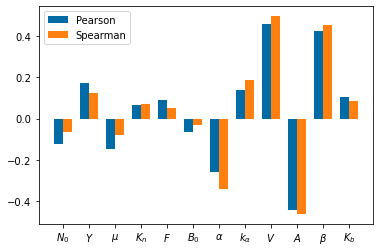

In [84]:
# =============================================================================
# Spearman correlation coefficient
# We will also use PyDoe for normal distribution
# =============================================================================



# =============================================================================
#This generates the LHS assuming normal distribution
#==============================================================================
import pyDOE as doe
from scipy.stats.distributions import norm
Num_samples=500
total_bacteria=np.zeros(Num_samples)
parameters=doe.lhs(12,samples=Num_samples)

for i in np.arange(12):
     #Parameters come from normal distribution
     # the 'ppf part provides the values. The standard deviation is the second
     #argument
     parameters[:,i] = norm(loc=params[i], scale=.1*params[i]).ppf(parameters[:, i]) #scaled parameters

N_init=0
Bu_init=.1
Bb_init=0

for i in np.arange(Num_samples):
    params_i=parameters[i,:]
    tspan = np.linspace(0, 100, 500)
    yp= solve_ivp(lambda t,Y: rhs(t,Y,params_i), [tspan[0],tspan[-1]], [N_init, Bu_init, Bb_init ], method='RK45',t_eval=tspan)
    total_bacteria[i]=np.trapz(yp.y[1],tspan)/np.trapz(yp.y[2],tspan)          #trapz is a relatively standard  implementation of the trapezoidal rule for integration
cc=np.zeros([2,12])
cc1=np.zeros([2,12])

for j in np.arange(12):
    cc[:,j]=scipy.stats.pearsonr(parameters[:,j], total_bacteria) 
    
for j in np.arange(12):
    cc1[:,j]=scipy.stats.spearmanr(parameters[:,j], total_bacteria) 



pyplot.figure()
bar_width=.35
pyplot.bar(np.arange(len(Params_names))-.5*bar_width,cc[0], bar_width)
pyplot.bar(np.arange(len(Params_names))+.5*bar_width,cc1[0], bar_width)
pyplot.xticks(np.arange(len(Params_names)), Params_names)
pyplot.legend(['Pearson', 'Spearman'])

#pyplot.savefig('cc_freter.png')


## Tragedy of the Commons

### Dynamics

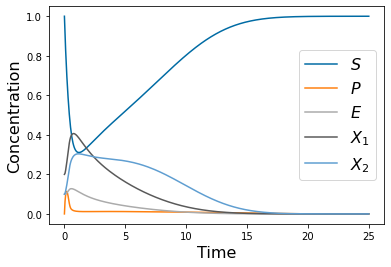

In [85]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 15 13:46:41 2019

@author: cogan
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  8 10:55:12 2019

@author: cogan
Coding Pearson (non-ranked transform) and Spearman
the main idea is to make a matrix of inputs (parameter sets)
and column of outputs (model evaluated at those parameters) 
and consider the correlation between the columns of parameters and column of outputs.
Recalling that the column of parameters is just different realizations of a single parameter
P = [X_p1;X_p2;X_p3...], X_pi is a column vector of parameters. 
Pearson: Cov(X_pi,Y_out)/sqrt(Var(X_pi)*var(y))
We use the PRCC version in the package pingouin. We also show native commands for the 
ranked correlation coefficienct to compare the estimates when discounting. 

This can be compared to the code in cheater.py that uses the package pyDOE
@author: cogan
"""
from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import numpy.matlib
from scipy.integrate import odeint
import matplotlib.pyplot as pyplot
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp
import scipy as scipy
pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible

#Define the RHS of ODEs
def f1(t,Y,params):
    S,P,E,X1,X2=Y
    S0,D,k1,k2,Yield,mu,K,q=params
    return D*(S0-S)-(k1*S*E-k2*P)
def f2(t,Y,params):
    S,P,E,X1,X2=Y
    S0,D,k1,k2,Yield,mu,K,q=params
    return (k1*S*E-k2*P)-1/Yield*(X1+X2)*mu*P/(K+P)-D*P
def f3(t,Y,params):
    S,P,E,X1,X2=Y
    S0,D,k1,k2,Yield,mu,K,q=params
    return (1-q)*X1*mu*P/(K+P)-D*E
def f4(t,Y,params):
    S,P,E,X1,X2=Y
    S0,D,k1,k2,Yield,mu,K,q=params
    return X1*q*mu*P/(K+P)-D*X1
def f5(t,Y,params):
    S,P,E,X1,X2=Y
    S0,D,k1,k2,Yield,mu,K,q=params
    return X2*mu*P/(K+P)-D*X2
def rhs(t,Y,params):
    S,P,E,X1,X2=Y
    S0,D,k1,k2,Yield,mu,K,q=params
    return [f1(t,Y,params),f2(t,Y,params),f3(t,Y,params),f4(t,Y,params),f5(t,Y,params)]
#####################from scipy.integrate import ode
param_list=['S','D','k1','k2','Yield','mu','K','q']
params_0=[ 1,1, 20, .005, 1, 5,.05,.8] #Nominal parameter values
tspan1 = np.linspace(0, 25, 500)
y0=[1,0,.1,.2,.1]
yp= solve_ivp(lambda t,Y: rhs(t,Y,params_0), [tspan1[0],tspan1[-1]], y0, method='RK45',t_eval=tspan1)

pyplot.figure(1) 
pyplot.plot(tspan1,yp.y[0])
pyplot.plot(tspan1,yp.y[1])
pyplot.plot(tspan1,yp.y[2])
pyplot.plot(tspan1,yp.y[3])
pyplot.plot(tspan1,yp.y[4])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Concentration', fontsize=16)
pyplot.legend(['$S$', '$P$', '$E$', '$X_1$', '$X_2$' ], fontsize=16)

### Spearman Correlation: Using Scipy.stats

[ 0.07929083 -0.01121848  0.55692256  0.00255228  0.4920642  -0.49062651
  0.10023931 -0.33358258]


([<matplotlib.axis.XTick at 0x7fcf71524eb0>,
 [Text(0, 0, 'S'),
  Text(1, 0, 'D'),
  Text(2, 0, 'k1'),
  Text(3, 0, 'k2'),
  Text(4, 0, 'Yield'),
  Text(5, 0, 'mu'),
  Text(6, 0, 'K'),
  Text(7, 0, 'q')])

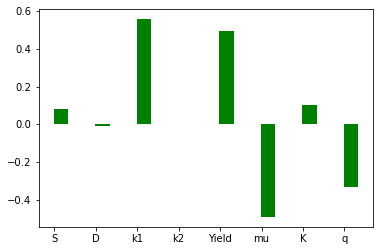

In [86]:

####Make the parameter matrix
N=500 # number of samples
del_p=.1 # parameter variation e.g. 10%
p_len=len(params_0)
X_param=np.zeros((p_len,N))
Y_out=np.zeros((N))
SA_pearson=np.zeros(p_len)
SA_spearman=np.zeros(p_len)
SA_PRCC=np.zeros(p_len)

tspan = np.linspace(0, 2, 500)

for i in range(0,p_len):
    #one parameter
    X_param[i,:]=np.random.uniform(params_0[i]*(1-del_p),params_0[i]*(1+del_p),N) 

for k in range(0,N):
    params=X_param[:,k]  
    yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan1[0],tspan1[-1]], y0, method='RK45',t_eval=tspan1)
    Y_out[k]=max(yp.y[1,:])
#    Y_out[k]=max(yp[1,:])
v_y=np.var(Y_out, dtype=np.float64)


Y_out_ranked=numpy.array(Y_out).argsort().argsort()
v_y_ranked= np.var(Y_out_ranked)
for j in range(0,p_len):
    X_param_ranked_all=numpy.array(X_param[j,:]).argsort().argsort()
for j in range(0,p_len):
    X_param_ranked=numpy.array(X_param[j,:]).argsort().argsort()
    v_pi_ranked=np.var(X_param_ranked, dtype=np.float64)
    cv_pi_y_ranked=np.cov(X_param_ranked, Y_out_ranked)
    SA_spearman[j]=cv_pi_y_ranked[0,1]/np.sqrt(v_pi_ranked*v_y_ranked)
print(SA_spearman)
pyplot.figure(2) 
bar_width = 0.35 
pyplot.bar(np.arange(0,p_len)+bar_width/2.2,width=bar_width,height=SA_spearman, color='g')
pyplot.xticks(np.arange(0,p_len), param_list)



### Spearman Using Pingouin

Text(0, 0.5, 'QoI')

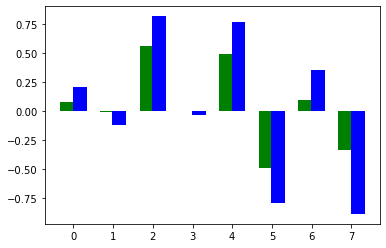

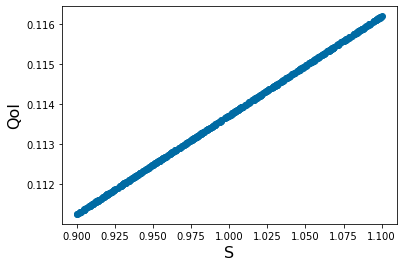

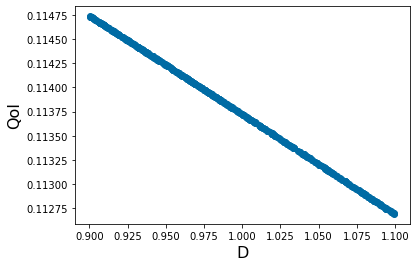

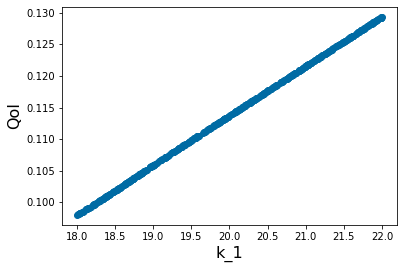

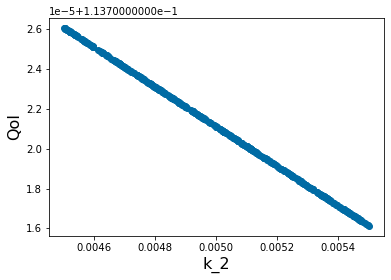

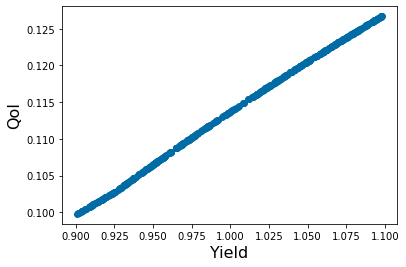

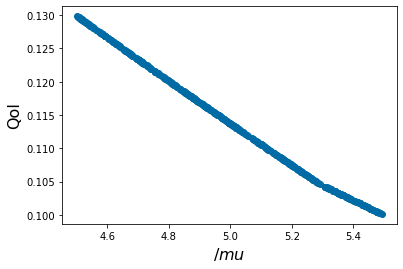

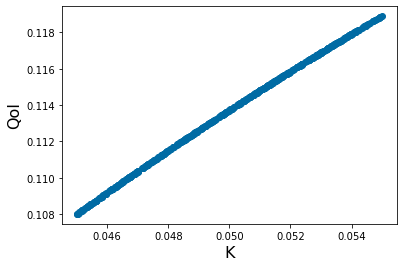

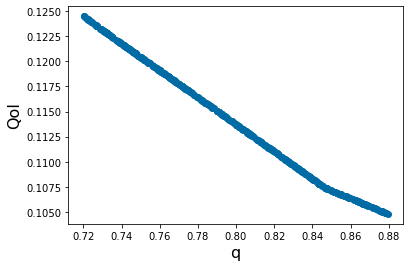

In [87]:


# =============================================================================
#Alternative implementation
# #pip install pingouin
# =============================================================================
import pandas as pd
v=['S','D','k1','k2','Yield','mu','K','q','X'];
df = pd.DataFrame(np.vstack((X_param, Y_out.T)).T, columns = ['S','D','k1','k2','Yield','mu','K','q','X'])
prcc=np.zeros(p_len)
import pingouin as pg
for i in range(0,p_len):
    list=v[0:i]+v[i+1:-2]
    prcc[i]=pg.partial_corr(data=df, x=v[i], y='X', covar=list,method='spearman').round(3).r

pyplot.bar(np.arange(0,p_len)-bar_width/2.2,width=bar_width,height=SA_spearman, color='g')

pyplot.bar(np.arange(0,p_len)+bar_width/2.2,width=bar_width,height=prcc, color='b')


# =============================================================================
# Scatter plots to check for monotonicity
# =============================================================================
Y_out_0=np.empty(N)
for k in range(0,N):
    params=[ X_param[0,k],1, 20, .005, 1, 5,.05,.8]
    yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan1[0],tspan1[-1]], y0, method='RK45',t_eval=tspan1)
    Y_out_0[k]=max(yp.y[1,:])
pyplot.figure(3) 

pyplot.scatter(X_param[0,:],Y_out_0)
pyplot.xlabel('S', fontsize=16)
pyplot.ylabel('QoI', fontsize=16)

Y_out_1=np.empty(N)
for k in range(0,N):
    params=[ 1, X_param[1,k], 20, .005, 1, 5,.05,.8]
    yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan1[0],tspan1[-1]], y0, method='RK45',t_eval=tspan1)
    Y_out_1[k]=max(yp.y[1,:])


pyplot.figure(4) 
pyplot.scatter(X_param[1,:],Y_out_1)
pyplot.xlabel('D', fontsize=16)
pyplot.ylabel('QoI', fontsize=16)

Y_out_2=np.empty(N)
for k in range(0,N):
    params=[ 1, 1, X_param[2,k], .005, 1, 5,.05,.8]
    yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan1[0],tspan1[-1]], y0, method='RK45',t_eval=tspan1)
    Y_out_2[k]=max(yp.y[1,:])


pyplot.figure(5) 
pyplot.scatter(X_param[2,:],Y_out_2)
pyplot.xlabel('k_1', fontsize=16)
pyplot.ylabel('QoI', fontsize=16)


Y_out_3=np.empty(N)
for k in range(0,N):
    params=[ 1, 1, 20, X_param[3,k], 1, 5,.05,.8]
    yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan1[0],tspan1[-1]], y0, method='RK45',t_eval=tspan1)
    Y_out_3[k]=max(yp.y[1,:])

pyplot.figure(6) 
pyplot.scatter(X_param[3,:],Y_out_3)
pyplot.xlabel('k_2', fontsize=16)
pyplot.ylabel('QoI', fontsize=16)



Y_out_4=np.empty(N)
for k in range(0,N):
    params=[ 1, 1, 20, .005, X_param[4,k], 5,.05,.8]
    yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan1[0],tspan1[-1]], y0, method='RK45',t_eval=tspan1)
    Y_out_4[k]=max(yp.y[1,:])


pyplot.figure(7) 
pyplot.scatter(X_param[4,:],Y_out_4)
pyplot.xlabel('Yield', fontsize=16)
pyplot.ylabel('QoI', fontsize=16)


Y_out_5=np.empty(N)
for k in range(0,N):
    params=[ 1, 1, 20, .005, 1, X_param[5,k],.05,.8]
    yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan1[0],tspan1[-1]], y0, method='RK45',t_eval=tspan1)
    Y_out_5[k]=max(yp.y[1,:])

pyplot.figure(8) 
pyplot.scatter(X_param[5,:],Y_out_5)
pyplot.xlabel('$/mu$', fontsize=16)
pyplot.ylabel('QoI', fontsize=16)


Y_out_6=np.empty(N)
for k in range(0,N):
    params=[ 1, 1, 20, .005, 1, 5,X_param[6,k],.8]
    yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan1[0],tspan1[-1]], y0, method='RK45',t_eval=tspan1)
    Y_out_6[k]=max(yp.y[1,:])

pyplot.figure(9) 
pyplot.scatter(X_param[6,:],Y_out_6)
pyplot.xlabel('K', fontsize=16)
pyplot.ylabel('QoI', fontsize=16)

Y_out_7=np.empty(N)
for k in range(0,N):
    params=[ 1, 1, 20, .005, 1, 5,.05,X_param[7,k]]
    yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan1[0],tspan1[-1]], y0, method='RK45',t_eval=tspan1)
    Y_out_6[k]=max(yp.y[1,:])

pyplot.figure(10) 
pyplot.scatter(X_param[7,:],Y_out_6)
pyplot.xlabel('q', fontsize=16)
pyplot.ylabel('QoI', fontsize=16)




### Sensitivity in Time and PRCC

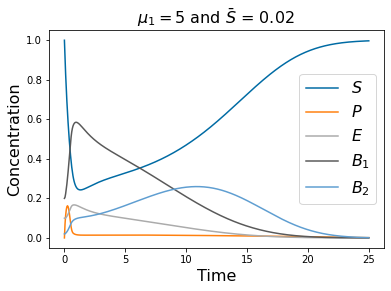

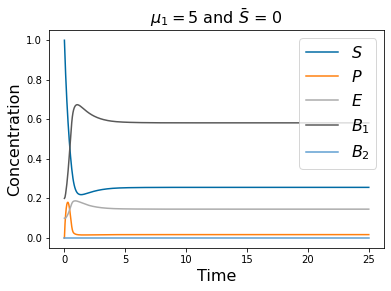

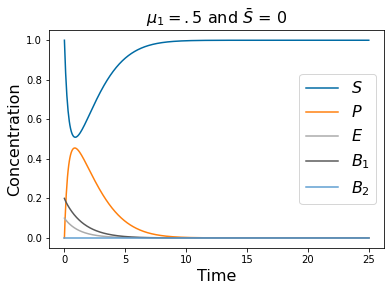

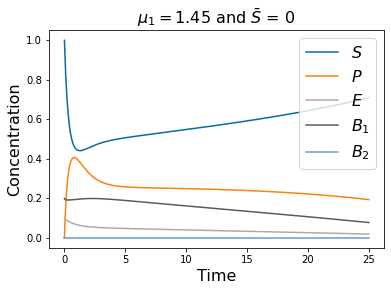

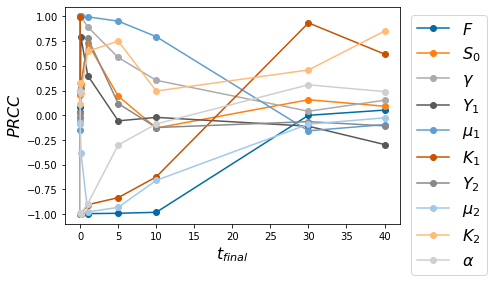

In [88]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 26 11:34:10 2021
Cheater model. PRCC in time is implemented with pyDOE
@author: cogan
"""



from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp
import pandas as pd
import pyDOE as doe
import pingouin as pg
from scipy.stats.distributions import norm

 #   import pingouin as pg

pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible


#Define the RHS of ODEs
def f1(t,Y,params): #S
    S, P, E, B1, B2=Y
    F, S0, gamma, Yield1, mu1, K1, Yield2, mu2, K2, alpha = params
    return F*S0-F*S-gamma*S*E
def f2(t,Y,params): #P
    S, P, E, B1, B2=Y
    F, S0, gamma, Yield1, mu1, K1, Yield2, mu2, K2, alpha = params
    return gamma*S*E-1/Yield1*mu1*P/(K1+P)*B1-1/Yield2*mu2*P/(K2+P)*B2-F*P
def f3(t,Y,params): #E
    S, P, E, B1, B2=Y
    F, S0, gamma, Yield1, mu1, K1, Yield2, mu2, K2, alpha = params
    return alpha*mu1*P*B1/(K1+P)-F*E
def f4(t,Y,params): # B1
    S, P, E, B1, B2=Y
    F, S0, gamma, Yield1, mu1, K1, Yield2, mu2, K2, alpha = params
    return (1-alpha)*mu1*P*B1/(K1+P)-F*B1
def f5(t,Y,params): #B2
    S, P, E, B1, B2=Y
    F, S0, gamma, Yield1, mu1, K1, Yield2, mu2, K2, alpha = params
    return mu2*P*B2/(K2+P)-F*B2
        
def rhs(t,Y,params):
    S, P, E, B1, B2=Y
    F, S0, gamma, Yield1, mu1, K1, Yield2, mu2, K2, alpha = params
    return [f1(t,Y,params),f2(t,Y,params),f3(t,Y,params),f4(t,Y,params),f5(t,Y,params)]

Params_names=['$F$', '$S_0$', r'$\gamma$', '$Y_1$', r'$\mu_1$', '$K_1$', '$Y_2$', r'$\mu_2$', '$K_2$',  r'$\alpha$'] 
# =============================================================================
# Note the differing initial conditions, here cheaters are present
# =============================================================================
params=[1, 1, 20,1, 5, .05, 1, 5, .05, .2]
tspan = np.linspace(0, 25, 500)
S_init=1
P_init=0
E_init=0.1
B1_init=.2
B2_init=0.02
yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [S_init, P_init, E_init, B1_init, B2_init], method='LSODA',t_eval=tspan)
pyplot.figure()

pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.plot(tspan,yp.y[2])
pyplot.plot(tspan,yp.y[3])
pyplot.plot(tspan,yp.y[4])

pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Concentration', fontsize=16)
pyplot.legend(['$S$', '$P$', '$E$', r'$B_1$', '$B_2$'], fontsize=16)
pyplot.title(r'$\mu_1=5$ and $\bar{S}$ = 0.02 ' , fontsize=16)

# =============================================================================
# Note the differing initial conditions, here cheaters are absent
# =============================================================================

params=[1, 1, 20,1, 5, .05, 1, 5, .05, .2]
tspan = np.linspace(0, 25, 500)
S_init=1
P_init=0
E_init=0.1
B1_init=.2
B2_init=0*0.02
yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [S_init, P_init, E_init, B1_init, B2_init], method='LSODA',t_eval=tspan)
pyplot.figure()


pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.plot(tspan,yp.y[2])
pyplot.plot(tspan,yp.y[3])
pyplot.plot(tspan,yp.y[4])

pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Concentration', fontsize=16)
pyplot.title(r'$\mu_1=5$ and $\bar{S}$ = 0 ' , fontsize=16)
pyplot.legend(['$S$', '$P$', '$E$', r'$B_1$', '$B_2$'], fontsize=16)

# =============================================================================
# Note the differing parameters, here mu_1 is small, no cheaters but the system 
# washout case is stable
# =============================================================================

params=[1, 1, 20,1, .5, .05, 1, 5, .05, .2]
tspan = np.linspace(0, 25, 500)
S_init=1
P_init=0
E_init=0.1
B1_init=.2
B2_init=0*0.02
yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [S_init, P_init, E_init, B1_init, B2_init], method='LSODA',t_eval=tspan)
pyplot.figure()

pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.plot(tspan,yp.y[2])
pyplot.plot(tspan,yp.y[3])
pyplot.plot(tspan,yp.y[4])

pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Concentration', fontsize=16)
pyplot.legend(['$S$', '$P$', '$E$', r'$B_1$', '$B_2$'], fontsize=16)
pyplot.title(r'$\mu_1=.5$ and $\bar{S}$ = 0 ' , fontsize=16)



# =============================================================================
# Note the differing parameters, here mu_1 is small, no cheaters but the system 
# washout case is almost stable
# =============================================================================

params=[1, 1, 20,1, 1.45, .05, 1, 5, .05, .2]
tspan = np.linspace(0, 25, 500)
S_init=1
P_init=0
E_init=0.1
B1_init=.2
B2_init=0*0.02
yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [S_init, P_init, E_init, B1_init, B2_init], method='LSODA',t_eval=tspan)
pyplot.figure()

pyplot.plot(tspan,yp.y[0])
pyplot.plot(tspan,yp.y[1])
pyplot.plot(tspan,yp.y[2])
pyplot.plot(tspan,yp.y[3])
pyplot.plot(tspan,yp.y[4])

pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Concentration', fontsize=16)
pyplot.legend(['$S$', '$P$', '$E$', r'$B_1$', '$B_2$'], fontsize=16)
pyplot.title(r'$\mu_1=1.45$ and $\bar{S}$ = 0 ' , fontsize=16)


# =============================================================================
#partial correlation coefficient
#We will also use PyDoe for normal distribution
# =============================================================================

# =============================================================================
#This generates the LHS assuming normal distribution
#==============================================================================
import pyDOE as doe
from scipy.stats.distributions import norm
Num_samples=50
total_bacteria=np.zeros(Num_samples)
parameters=doe.lhs(10,samples=Num_samples)

for i in np.arange(10):
     parameters[:,i] = norm(loc=params[i], scale=.025*params[i]).ppf(parameters[:, i]) #scaled parameters


params=[1, 1, 20,1, 1.45, .05, 1, 5, .05, .2]
tspan = np.linspace(0, 25, 500)
S_init=1
P_init=0
E_init=0.1
B1_init=.2
B2_init=0.02
PRCC_in_time=np.empty([11,10])
# =============================================================================
# Time loop for moving the ending time out time: we are using LSODA as the integrator
# =============================================================================
for k in np.arange(9):
    
    tfinal=[.001,.01,.1,1,5,10,30, 40, 50,100][k]
    correlation_matrix=np.empty([Num_samples,11])
    for i in np.arange(Num_samples):
        params_i=parameters[i,:]
        tspan = np.linspace(0, tfinal, 500)
        yp= solve_ivp(lambda t,Y: rhs(t,Y,params_i), [tspan[0],tspan[-1]], [S_init, P_init, E_init, B1_init, B2_init], method='LSODA',t_eval=tspan)
        correlation_matrix[i,:]=np.append(parameters[i,:],yp.y[3][-1])

    Correlation_data=pd.DataFrame(data=correlation_matrix,
              index=pd.RangeIndex(range(0, Num_samples)),
              columns=pd.RangeIndex(range(0, 11)))
    Correlation_data.columns = ['$F$', '$S_0$', r'$\gamma$', '$Y_1$', r'$\mu_1$', '$K_1$', '$Y_2$', r'$\mu_2$', '$K_2$',  r'$\alpha$', 'QoI']
    
    PRCC=Correlation_data.pcorr()
    PRCC_in_time[:,k]=PRCC[PRCC.columns[-1]].values
pyplot.figure()
for k in np.arange(10):
    pyplot.plot([.001,.01,.1,1,5,10,30, 40],PRCC_in_time[k,0:-2],'o-')
    pyplot.legend(['$F$', '$S_0$', r'$\gamma$', '$Y_1$', r'$\mu_1$', '$K_1$', '$Y_2$', r'$\mu_2$', '$K_2$',  r'$\alpha$'], bbox_to_anchor=(1.01,1), loc='upper left', fontsize=16)
#    pyplot.xticks(np.arange(7),['T=.001','T=..01','T=..1','T=.1','T=.5','T=.10','T=.50'])
    pyplot.xlabel(r'$t_{final}$', fontsize=16)
    pyplot.ylabel(r'$PRCC$', fontsize=16)





# Circulation and Cardiac Physiology

## Fixed/Frozen Example:

Text(0, 0.5, 'Frequency')

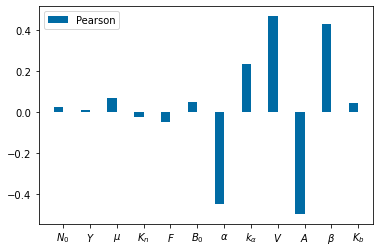

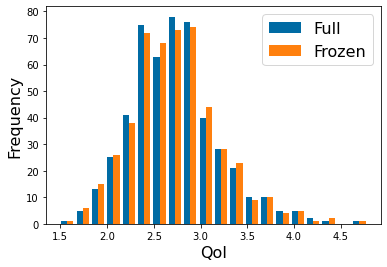

In [89]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 26 11:34:10 2021
Example of freezing parameters, Freter model. The idea is to run the model
will all parameters varying and comparing the statistics of the output to 
samples of the model with only the sensitive parameters varying.

This is one standard use of sensitivity -- it can reduce the parameter space needed
to provide accurate predictions.
@author: cogan
"""



from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp
import scipy as scipy
import pyDOE as doe
from scipy.stats.distributions import norm
pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible


# =============================================================================
# Define the RHS of ODEs
# =============================================================================
def f1(t,Y,params):
    N, Bu, Bb=Y
    N0, Yield, mu, K_n, F, B0, alpha, K_alpha, V, A, beta, K_b = params
    return N0*F-1/Yield*mu*N/(K_n+N)*(Bu+Bb)-F*N
def f2(t,Y,params):
    N, Bu, Bb=Y
    N0, Yield, mu, K_n, F, B0, alpha, K_alpha, V, A, beta, K_b = params
    return B0*F-alpha/(K_alpha+Bb)*Bu+V/A*beta*Bb \
            -F*Bu +(1-Bb/(K_b+Bb))*1/Yield*mu*N/(K_n+N)*Bb-F*Bu
def f3(t,Y,params):
    N, Bu, Bb=Y
    N0, Yield, mu, K_n, F, B0, alpha, K_alpha, V, A, beta, K_b = params
    return A/V*alpha/(K_alpha+Bb)*Bu-beta*Bb \
        +A/V*Bb/(K_b+Bb)*1/Yield*mu*N/(K_n+N)*Bb
def rhs(t,Y,params):
    N, Bu, Bb=Y
    N0, Yield, mu, K_n, F, B0, alpha, K_alpha, V, A, beta, K_b = params
    return [f1(t,Y,params),f2(t,Y,params),f3(t,Y,params)]




# =============================================================================
#This generates the LHS assuming normal distribution
#We use PRCC to determine the sensitivities
#==============================================================================
Params_names=['$N_0$', '$Y$', '$\mu$', '$K_n$', '$F$', '$B_0$', r'$\alpha$', r'$k_\alpha$', '$V$', '$A$', r'$\beta$', '$K_b$'] 
params=[1, .1, 1, .5, 1, .1, .1, .1, 10, 1, .2, .5]
tspan = np.linspace(0, 40, 500)
N_init=0
Bu_init=.1
Bb_init=0
Num_samples=500
total_bacteria=np.zeros(Num_samples)
parameters=doe.lhs(12,samples=Num_samples)

for i in np.arange(12):
     parameters[:,i] = norm(loc=params[i], scale=.1*params[i]).ppf(parameters[:, i]) #scaled parameters


for i in np.arange(Num_samples):
    
    params_i=parameters[i,:]
    tspan = np.linspace(0, 100, 500)
    yp= solve_ivp(lambda t,Y: rhs(t,Y,params_i), [tspan[0],tspan[-1]], [N_init, Bu_init, Bb_init ], method='RK45',t_eval=tspan)
    total_bacteria[i]=np.trapz(yp.y[1],tspan)/np.trapz(yp.y[2],tspan)          #trapz is a relatively standard  implementation of the trapezoidal rule for integration
cc=np.zeros([2,12])
cc1=np.zeros([2,12])

for j in np.arange(12):
    cc[:,j]=scipy.stats.pearsonr(parameters[:,j], total_bacteria) 
    
for j in np.arange(12):
    cc1[:,j]=scipy.stats.spearmanr(parameters[:,j], total_bacteria) 



pyplot.figure()
bar_width=.35
pyplot.bar(np.arange(len(Params_names))-.5*bar_width,cc[0], bar_width)
pyplot.xticks(np.arange(len(Params_names)), Params_names)
pyplot.legend(['Pearson', 'Spearman'])

# =============================================================================
# It is relatively simple to see that several of these are not sensitive
# we freeze those by keeping them at their nominal value (line 111 below)
# =============================================================================
# =============================================================================
# Frozen histograms
# =============================================================================
total_bacteria_frozen=np.zeros(Num_samples)

for i in np.arange(Num_samples):
    
    params_i=parameters[i,:]
    params_i[0:5]=params[0:5]
    tspan = np.linspace(0, 100, 500)
    yp= solve_ivp(lambda t,Y: rhs(t,Y,params_i), [tspan[0],tspan[-1]], [N_init, Bu_init, Bb_init ], method='RK45',t_eval=tspan)
    total_bacteria_frozen[i]=np.trapz(yp.y[1],tspan)/np.trapz(yp.y[2],tspan)          #trapz is a relatively standard  implementation of the trapezoidal rule for integration

pyplot.figure()
pyplot.hist([total_bacteria,total_bacteria_frozen],20)
pyplot.legend(['Full', 'Frozen'],fontsize=16)
pyplot.xlabel('QoI',fontsize=16)
pyplot.ylabel('Frequency',fontsize=16)



## Circulation Model and Different Sampling Methods

[60.4054232   2.67197196  0.15140885]


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


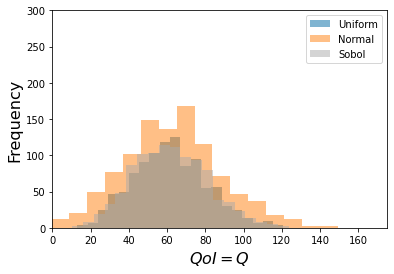

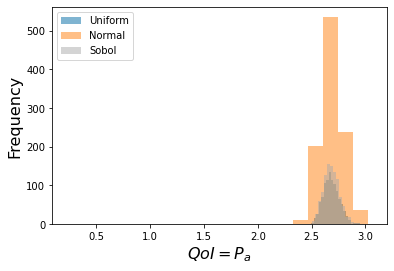

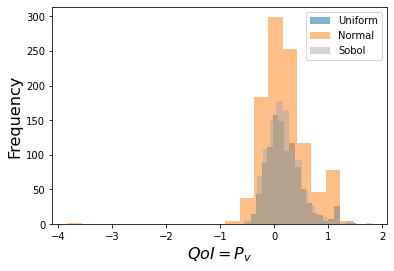

In [90]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 26 11:34:10 2021
Circulation model: Algebraic 
@author: cogan
"""



from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.stats import qmc # for LHS
from scipy.optimize import fsolve
pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible


#Define the RHS of the equations
def f1(Y,params):
    Q,Pa, Pv=Y
    Qvessel, R, gamma, Vvessel,V0, F, Vmax, Vmin, Cd, Cs= params
    return (Pa-Pv)/R*(1+gamma*(Pa+Pv)+gamma**2/3*(Pa**2+Pa*Pv+Pv**2))-Qvessel
def f2(Y,params):
    Q,Pa, Pv=Y
    Qvessel, R, gamma, Vvessel,V0, F, Vmax, Vmin, Cd, Cs= params
    return V0*(1+gamma/2*(Pa+Pv)+gamma**2/6*(Pa-Pv)**2)-Vvessel
def f3(Y,params):
    Q,Pa, Pv=Y
    Qvessel, R, gamma, Vvessel,V0, F, Vmax, Vmin, Cd, Cs= params
    return F*(Vmax-Vmin+Cd*Pv-Cs*Pa)-Q
def rhs(Y,params):
    Q,Pa, Pv=Y
    Qvessel, R, gamma, Vvessel,V0, F, Vmax, Vmin, Cd, Cs= params
    return [f1(Y,params),f2(Y,params),f3(Y,params)]

params=[5, 5.5, 1.50, 11,2,80, 5,4, .5,.12]
solution1 = fsolve(rhs, (10,.11,.1),args=(params,) )
print(solution1)

# =============================================================================
# Normal distribution
# =============================================================================
n_power=10
Num_samples=2**n_power
total_bacteria=np.zeros(Num_samples)

import pyDOE as doe
from scipy.stats.distributions import norm
parameters_normal=doe.lhs(10,samples=Num_samples)

for i in np.arange(10):
     parameters_normal[:,i] = norm(loc=params[i], scale=.04*params[i]).ppf(parameters_normal[:, i]) #scaled parameters
#Explore how the variance changes things

# =============================================================================
# Uniform distribution
# =============================================================================
sampler = qmc.LatinHypercube(d=10) #Define the sampling method and parameter dimension
parameters_uniform = sampler.random(n=Num_samples)      #number of samples to take
 #Scale the samples into the correct parameter scale
l_bounds = np.multiply(params,.95)
u_bounds = np.multiply(params,1.05)
parameters_uniform=qmc.scale(parameters_uniform, l_bounds, u_bounds)
# 
# =============================================================================
# Sobol distribution: Scrambled Sobol Sequences.
# =============================================================================
sampler = qmc.Sobol(d=10,scramble=True,) #Define the sampling method and parameter dimension
parameters_sobol = sampler.random_base2(m=n_power)   #number of samples to take
 #Scale the samples into the correct parameter scale
l_bounds = np.multiply(params,.95)
u_bounds = np.multiply(params,1.05)
parameters_sobol=qmc.scale(parameters_sobol, l_bounds, u_bounds)

FP_uniform=np.zeros([3,Num_samples])
FP_normal=np.zeros([3,Num_samples])
FP_sobol=np.zeros([3,Num_samples])


for i in np.arange(Num_samples):
    FP_uniform[:,i]=fsolve(rhs, (10,.11,.1),args=(parameters_uniform[i,:],) )
    FP_normal[:,i]=fsolve(rhs, (10,.11,.1),args=(parameters_normal[i,:],) )
    FP_sobol[:,i]=fsolve(rhs, (10,.11,.1),args=(parameters_sobol[i,:],) )


pyplot.hist(FP_uniform[0,:],20, alpha=.5)
pyplot.hist(FP_normal[0,:],20, alpha=.5)
pyplot.hist(FP_sobol[0,:],20, alpha=.5)
pyplot.axis([0, 175,0, 300])
pyplot.xlabel('$QoI=Q$', fontsize=16)
pyplot.ylabel('Frequency', fontsize=16)
pyplot.legend(['Uniform', 'Normal', 'Sobol'])
#pyplot.savefig('Q.png')

pyplot.figure()
pyplot.hist(FP_uniform[1,:],20, alpha=.5)
pyplot.hist(FP_normal[1,:],20, alpha=.5)
pyplot.hist(FP_sobol[1,:],20, alpha=.5)
pyplot.axis('tight')
pyplot.xlabel('$QoI=P_a$', fontsize=16)
pyplot.ylabel('Frequency', fontsize=16)
pyplot.legend(['Uniform', 'Normal', 'Sobol'])
#pyplot.savefig('P_a.png')

pyplot.figure()

pyplot.hist(FP_uniform[2,:],20, alpha=.5)
pyplot.hist(FP_normal[2,:],20, alpha=.5)
pyplot.hist(FP_sobol[2,:],20, alpha=.5)
pyplot.axis('tight')
pyplot.xlabel('$QoI=P_v$', fontsize=16)
pyplot.ylabel('Frequency', fontsize=16)
pyplot.legend(['Uniform', 'Normal', 'Sobol'])
#pyplot.savefig('P_v.png')


## Noble Cardiac Model:

### Dynamics

Text(0, 0.5, 'Voltage')

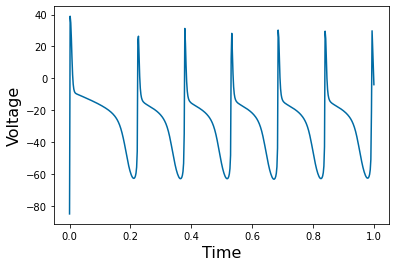

In [91]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 26 11:34:10 2021
Noble model using Morris screening as implemented in SAlib. 
A version without packages is shown in the MATLAB implementation.
@author: cogan
"""



from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp
pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible


# =============================================================================
# Define the RHS of ODEs
# =============================================================================


def f1(t,Y,params):
    V, m, h, n=Y
    Cm, alpham_0, betam_0, alphah_0, betah_0, alphan_0, betan_0,  Ek, ENa, EAn= params
    INa=(400000*m**3*h+140)*(V-ENa)
    Ik=1200*n**4*(V-Ek)+(1200*np.exp((-V-90)/50)+15*np.exp((V+90)/60))*(V-Ek)
    Ian=75*(V-ENa)
    return -(INa+Ik+Ian)/Cm
def f2(t,Y,params):
    V, m, h, n=Y
    Cm, alpham_0, betam_0, alphah_0, betah_0, alphan_0, betan_0,  Ek, ENa, EAn= params
    alpham=alpham_0*(-V-48)/(np.exp((-V-48)/15)-1)
    betam=betam_0*(V+8)/(np.exp((V+8)/5)-1)
    return alpham*(1-m)-betam*m
def f3(t,Y,params):
    V, m, h, n=Y
    Cm, alpham_0, betam_0, alphah_0, betah_0, alphan_0, betan_0,  Ek, ENa, EAn= params
    alphah=alphah_0*np.exp((-V-90)/20)
    betah=betah_0/(1+np.exp((-V-42)/10))
    return alphah*(1-h)-betah*h
def f4(t,Y,params):
    V, mh, h, n=Y
    Cm, alpham_0, betam_0, alphah_0, betah_0, alphan_0, betan_0,  Ek, ENa, EAn= params
    alphan=alphan_0*(-V-50)/(np.exp((-V-50)/10)-1)
    betan=betan_0*np.exp((-V-90)/80)
    return alphan*(1-n)-betan*n

def rhs(t,Y,params):
    V, mh, h, n=Y
    Cm, alpham_0, betam_0, alphah_0, betah_0, alphan_0, betan_0,  Ek, ENa, EAn= params
    return [f1(t,Y,params),f2(t,Y,params),f3(t,Y,params),f4(t,Y,params)]
params_list=['Cm', '$\alpha m_0$',  '$\betam_0',  '$\alphah_0',  '$\betah_0',  '$\alphan_0',  '$\betan_0',   '$\Ek',  '$\ENa',  '$\EAn']

params=[6.000, 100, 120,170,1000,0.1,2, -100, 40,-60]
V0=-85
m0=.5
h0=.75
n0=.65
tspan = np.linspace(0, 1, 500)
yp= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [V0,m0,h0,n0], method='LSODA',t_eval=tspan)
pyplot.plot(tspan,yp.y[0])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Voltage', fontsize=16)

### FFT to find period

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)


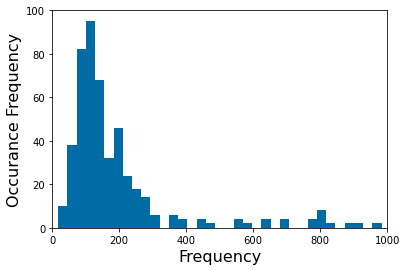

In [92]:

# =============================================================================
# plot histogram example
# =============================================================================
bin_number,frequency,_=pyplot.hist(np.abs((np.fft.fft(yp.y[0]))),500) 
pyplot.axis([0, 1000, 0, 100])
pyplot.xlabel('Frequency', fontsize=16)
pyplot.ylabel('Occurance Frequency', fontsize=16)
#pyplot.savefig('noble_FFT.png')

# =============================================================================
# Measure the frequency using fft
# =============================================================================
bin_number,frequency = np.histogram((np.fft.fft(yp.y[0])),500)
max_bin=np.argmax(bin_number) #find bin with max frequency
QoI=np.abs(frequency[max_bin])

### Morris Method:

                        mu     mu_star      sigma  mu_star_conf
Cm               -1.445678    7.524640  22.021027      1.930993
${\alpha_m}_0$   -0.918631   12.256881  29.514042      2.106014
${\beta_m}_0$     3.139214   11.500143  27.621456      2.123788
${\alpha_h}_0$   -2.287952   11.259494  27.222511      2.384708
${\beta_h}_0$    -1.116990   11.348323  27.919644      2.487293
${\alpha_n}_0$   -0.955651   10.890921  24.685923      1.918662
${\beta_n}_0$     0.018566    6.125478  18.097633      1.376309
$E_k$           118.330428  118.389912  30.240191      2.792165
$E_{Na}$         -0.845273    7.912855  19.654096      1.431531
$E_{An}$          0.000000    0.000000   0.000000      0.000000


<BarContainer object of 10 artists>

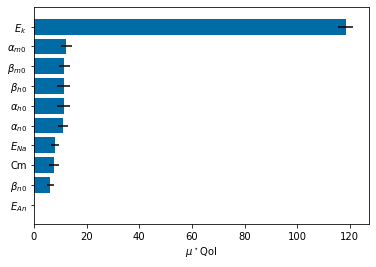

In [93]:
# =============================================================================
# Morris method as implemented in SAlib
# =============================================================================

from SALib.analyze import morris
from SALib.sample.morris import sample
from SALib.plotting.morris import horizontal_bar_plot, covariance_plot, \
    sample_histograms

params=[6.000, 100, 120,170,1000,0.1,2, -100, 40,-60]
V0=-85
m0=.5
h0=.75
n0=.65
b=np.empty([10,2])

# =============================================================================
# Problem defines the sampling space. It is a python library that defines 
# variables in ''. 
# =============================================================================
for i in np.arange(10):
    b[i,:]=[.95*params[i],1.05*params[i]]
problem = {
  'num_vars': 10,
  'names': [r'Cm', r'${\alpha_m}_0$',  r'${\beta_m}_0$',  r'${\alpha_h}_0$',  r'${\beta_h}_0$',  r'${\alpha_n}_0$',  r'${\beta_n}_0$',   r'$E_k$',  r'$E_{Na}$',  r'$E_{An}$'],
  'groups': None,
  'bounds': [[ 5.700e+00,  6.300e+00],
         [ 9.500e+01,  1.050e+02],
         [ 1.140e+02,  1.260e+02],
         [ 1.615e+02,  1.785e+02],
         [ 9.500e+02,  1.050e+03],
         [ 9.500e-02,  1.050e-01],
         [ 1.900e+00,  2.100e+00],
         [-1.050e+02, 9.500e+01],
         [ 3.800e+01,  4.200e+01],
         [ -6.300e+01,-5.700e+01]]
}

# =============================================================================
#  Generate samples using the sample command
# =============================================================================
param_values = sample(problem, N=500, num_levels=4,
                      optimal_trajectories=None)

# =============================================================================
#  Run the "model" -- this will happen offline for external models
# =============================================================================
tspan = np.linspace(0, 1, 10)
Y = np.empty([len(param_values)])
for i in np.arange(len(Y)):
    yp= solve_ivp(lambda t,Y: rhs(t,Y,param_values[i]), [tspan[0],tspan[-1]], [V0,m0,h0,n0], method='LSODA',t_eval=tspan)
    bin_number,frequency = np.histogram(np.abs(np.fft.fft(yp.y[0])),500)
    max_bin=np.argmax(bin_number) #find bin with max frequency
    Y[i]=np.abs(frequency[max_bin])
 
# =============================================================================
#  Perform the sensitivity analysis using the model output
#  Specify which column of the output file to analyze (zero-indexed)
# =============================================================================
Si = morris.analyze(problem, param_values, Y, conf_level=0.95,
                    print_to_console=True,
                    num_levels=4, num_resamples=100)
# =============================================================================
#  Returns a dictionary with keys 'mu', 'mu_star', 'sigma', and 'mu_star_conf'
#  e.g. Si['mu_star'] contains the mu* value for each parameter, in the
#  same order as the parameter file
# =============================================================================
fig, (ax1) = pyplot.subplots(1, 1)
horizontal_bar_plot(ax1,Si, {}, sortby='mu_star', unit=r"QoI")
#covariance_plot(ax2, Si, {}, unit=r"tCO$_2$/year")



# NeuroScience

## Hodgkin-Huxley Equations

## Dynamics for different Voltages

Text(0, 0.5, 'Voltage')

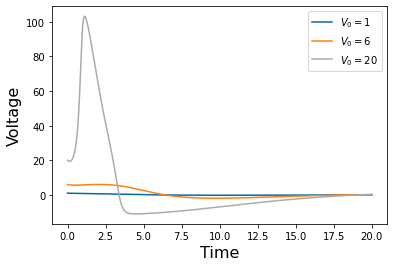

In [94]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 26 11:34:10 2021
Hodgkin-Huxley model: Sobol Sensitivity as implemented in SAlib
@author: cogan
"""



from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp
pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible


#Define the RHS of ODEs
def f1(t,Y,params):
    V, m, h, n=Y
    Cm, alpham_0, betam_0, alphah_0, betah_0, alphan_0, betan_0,gK,gNa, gl, Vk, VNa, Vl, Iapp= params
    INa=gNa*m**3*h*(V-VNa)
    Ik=gK*n**4*(V-Vk)
    Il=gl*(V-Vl)
    return -(INa+Ik+Il)/Cm+Iapp
def f2(t,Y,params):
    V, m, h, n=Y
    Cm, alpham_0, betam_0, alphah_0, betah_0, alphan_0, betan_0,gK,GNa, Gl, Vk, VNa, Vl, Iapp= params
    alpham=alpham_0*(25-V)/(np.exp((25-V)/10)-1)
    betam=betam_0*np.exp(-V/18)
    return alpham*(1-m)-betam*m
def f3(t,Y,params):
    V, m, h, n=Y
    Cm, alpham_0, betam_0, alphah_0, betah_0, alphan_0, betan_0,gK,GNa, Gl, Vk, VNa, Vl, Iapp= params
    alphah=alphah_0*np.exp((-V)/20)
    betah=betah_0/(1+np.exp((-V+30)/10))
    return alphah*(1-h)-betah*h
def f4(t,Y,params):
    V, mh, h, n=Y
    Cm, alpham_0, betam_0, alphah_0, betah_0, alphan_0, betan_0,gK,GNa, Gl, Vk, VNa, Vl, Iapp= params
    alphan=alphan_0*(-V+10)/(np.exp((-V+10)/10)-1)
    betan=betan_0*np.exp((-V)/80)
    return alphan*(1-n)-betan*n

def rhs(t,Y,params):
    V, mh, h, n=Y
    Cm, alpham_0, betam_0, alphah_0, betah_0, alphan_0, betan_0,gK,GNa, Gl, Vk, VNa, Vl, Iapp= params
    return [f1(t,Y,params),f2(t,Y,params),f3(t,Y,params),f4(t,Y,params)]
params_list=[ r'$C_m$', r'${\alpha_m}_0$', r'${\beta_m}_0$', r'${\alpha_h}_0$', r'${\beta_h}_0$', r'${\alpha_n}_0$', r'${\beta_n}_0$',r'$g_K$',r'$g_{Na}$', r'$g_l$', r'$V_k$', r'$V_{Na}$', r'$V_l$', r'$I_{app}$']


params=[2.000, .1, 4,.07,1,0.01,.125,36, 120, .3,-12, 115,10.6,0*35]
V0=1
m0=.053
h0=.595
n0=.317
tspan = np.linspace(0, 20, 500)
yp1= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [V0,m0,h0,n0], method='LSODA',t_eval=tspan)
params=[2.000, .1, 4,.07,1,0.01,.125,36, 120, .3,-12, 115,10.6,0*35]
V0=6
m0=.053
h0=.595
n0=.317
tspan = np.linspace(0, 20, 500)
yp2= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [V0,m0,h0,n0], method='LSODA',t_eval=tspan)
params=[2.000, .1, 4,.07,1,0.01,.125,36, 120, .3,-12, 115,10.6,0*35]
V0=20
m0=.053
h0=.595
n0=.317
tspan = np.linspace(0, 20, 500)
yp3= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [V0,m0,h0,n0], method='LSODA',t_eval=tspan)

pyplot.plot(tspan,yp1.y[0])
pyplot.plot(tspan,yp2.y[0])

pyplot.plot(tspan,yp3.y[0])
pyplot.legend(['$V_0=1$','$V_0=6$','$V_0=20$'])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Voltage', fontsize=16)
#pyplot.savefig('HH_compare.png')

## Sobol' Sensitivity Using SALib:

                      ST   ST_conf
$C_m$           0.124651  0.042025
${\alpha_m}_0$  0.259904  0.061259
${\beta_m}_0$   0.373257  0.074047
${\alpha_h}_0$  0.461450  0.073864
${\beta_h}_0$   0.539395  0.083902
${\alpha_n}_0$  0.688355  0.095978
${\beta_n}_0$   0.806809  0.107457
$g_K$           0.914084  0.107407
$g_{Na}$        1.025044  0.110948
$g_l$           1.120096  0.106848
$V_k$           1.214593  0.111428
$V_{Na}$        1.343400  0.108980
$V_l$           1.473913  0.111820
$I_{app}$       1.548615  0.106593
                      S1   S1_conf
$C_m$          -0.031112  0.047031
${\alpha_m}_0$ -0.048717  0.076293
${\beta_m}_0$  -0.070926  0.091788
${\alpha_h}_0$ -0.047694  0.103755
${\beta_h}_0$  -0.052785  0.104063
${\alpha_n}_0$ -0.032888  0.125093
${\beta_n}_0$  -0.029736  0.132589
$g_K$           0.001291  0.132898
$g_{Na}$       -0.032439  0.137225
$g_l$           0.015540  0.147614
$V_k$           0.004807  0.159269
$V_{Na}$        0.014791  0.169956
$V_l$           0.04

Text(0, 0.5, 'Sobol')

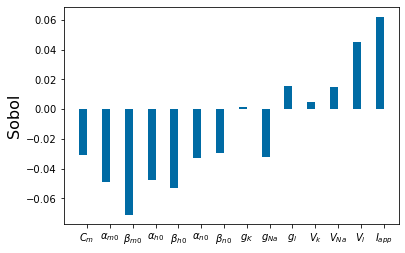

In [95]:
# =============================================================================
# Sobol' sensitivity. The setup is essentially the same as Morris screening
# since they are both calculated using the the SAlib package
# =============================================================================

from SALib.analyze import sobol
from SALib.sample.morris import sample

params=[2.000, .1, 4,.07,1,0.01,.125,36, 120, .3,-12, 115,10.6,10]
V0=1
m0=.053
h0=.595
n0=.317
# or define parameters
b=np.zeros([14,2])
# =============================================================================
# Set up the samples
# =============================================================================

for i in np.arange(len(params)):
    b[i,:]=[.95*params[i],1.05*params[i]]
b.sort(axis=1) # sort the rows that are negative    
problem = {
  'num_vars': 13,
  'names': [ r'$C_m$', r'${\alpha_m}_0$', r'${\beta_m}_0$', r'${\alpha_h}_0$', r'${\beta_h}_0$', r'${\alpha_n}_0$', r'${\beta_n}_0$',r'$g_K$',r'$g_{Na}$', r'$g_l$', r'$V_k$', r'$V_{Na}$', r'$V_l$', r'$I_{app}$'],
  'groups': None,
  'bounds': b
}
# Files with a 4th column for "group name" will be detected automatically, e.g.
# param_file = '../../src/SALib/test_functions/params/Ishigami_groups.txt'

# Generate samples
param_values = sample(problem, N=900, num_levels=4,
                      optimal_trajectories=None)

# =============================================================================
# Run the model
# =============================================================================

tspan = np.linspace(0, 20, 100)
Y = np.empty([len(param_values)])
for i in np.arange(len(Y)):
    yp= solve_ivp(lambda t,Y: rhs(t,Y,param_values[i]), [tspan[0],tspan[-1]], [V0,m0,h0,n0], method='LSODA',t_eval=tspan)
    Y[i]=np.max(yp.y[0])
# =============================================================================
# Perform the sensitivity analysis using the model output
# =============================================================================
Si = sobol.analyze(problem, Y, calc_second_order=True, conf_level=0.95, print_to_console=True)
# Returns a dictionary with keys 'S1', 'S1_conf', 'ST', and 'ST_conf'
# e.g. Si['S1'] contains the first-order index for each parameter,
# in the same order as the parameter file
bar_width=.35
pyplot.bar(np.arange(len(params_list))-.5*bar_width,Si['S1'], bar_width)
pyplot.xticks(np.arange(len(params_list)), params_list)
pyplot.ylabel('Sobol',fontsize=16)


# Fitzhugh-Nagumo:

## Dynamics:

Text(0, 0.5, 'Voltage')

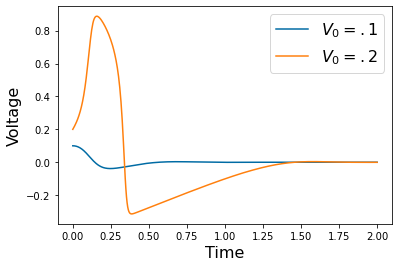

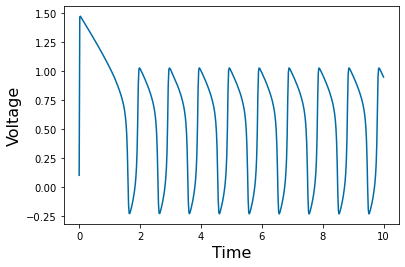

In [96]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 26 11:34:10 2021
FHN model 
@author: cogan
"""



from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp
pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible


#Define the RHS of ODEs
def f1(t,Y,params):
    V, w=Y
    epsilon, A, alpha, w0, gamma= params
    return 1/epsilon*(A*V*(V-alpha)*(1-V)-w-w0) 
def f2(t,Y,params):
    V, w=Y
    epsilon, A, alpha, w0, gamma= params
    return (V-gamma*w)

def rhs(t,Y,params):
    V, w=Y
    epsilon, A, alpha, w0, gamma= params
    return [f1(t,Y,params),f2(t,Y,params)]
params_list=[r'$\epsilon$', '$A$', r'$\alpha$', '$w_0$', r'$\gamma$']
#Change IC to show excitable
params=[.01, 1, .1, 0, .5]
V0=.1
w0=0
tspan = np.linspace(0, 2, 500)
yp1= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [.1,w0], method='LSODA',t_eval=tspan)
yp2= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [.2,w0], method='LSODA',t_eval=tspan)
pyplot.plot(tspan,yp1.y[0])
pyplot.plot(tspan,yp2.y[0])
pyplot.legend(['$V_0=.1$', '$V_0=.2$'],fontsize=16)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Voltage', fontsize=16)
#pyplot.savefig('FHN_Excitable.png')


params=[.01, 1, .1, -1, .5]
V0=.1
w0=0
tspan = np.linspace(0, 10, 500)
yp1= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [.1,w0], method='LSODA',t_eval=tspan)
pyplot.figure()
pyplot.plot(tspan,yp1.y[0])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Voltage', fontsize=16)
#pyplot.savefig('FHN_tonic.png')


## Sobol' Versus Moment Independance

                  ST   ST_conf
$\epsilon$  0.944099  0.164114
$A$         1.188187  0.164864
$\alpha$    0.950987  0.153948
$w_0$       0.985868  0.150611
$\gamma$    0.890343  0.139326
                  S1   S1_conf
$\epsilon$  0.002658  0.170089
$A$        -0.032849  0.177719
$\alpha$    0.032989  0.157241
$w_0$       0.008771  0.165269
$\gamma$    0.127801  0.179794
                              S2   S2_conf
($\epsilon$, $A$)      -0.022669  0.235017
($\epsilon$, $\alpha$)  0.012683  0.219487
($\epsilon$, $w_0$)     0.178638  0.247790
($\epsilon$, $\gamma$) -0.041223  0.243301
($A$, $\alpha$)         0.026805  0.243016
($A$, $w_0$)            0.127909  0.209397
($A$, $\gamma$)         0.006673  0.256789
($\alpha$, $w_0$)       0.062487  0.226852
($\alpha$, $\gamma$)   -0.125255  0.243082
($w_0$, $\gamma$)      -0.163998  0.274336
               delta  delta_conf        S1   S1_conf
$\epsilon$  0.057412    0.005844  0.007926  0.005022
$A$         0.067287    0.008833  0.015764  0.009

Text(0, 0.5, 'Voltage')

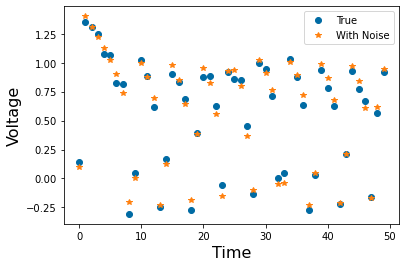

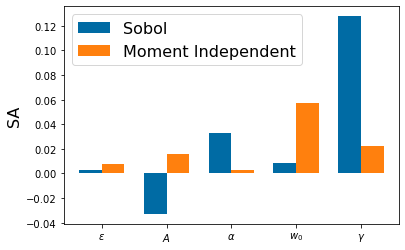

<Figure size 432x288 with 0 Axes>

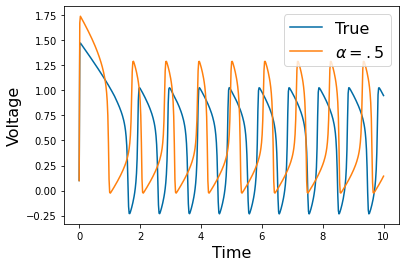

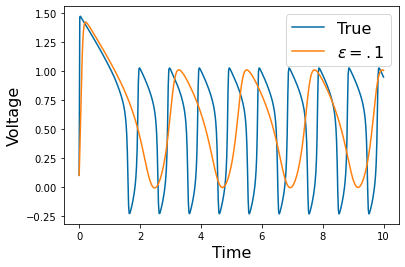

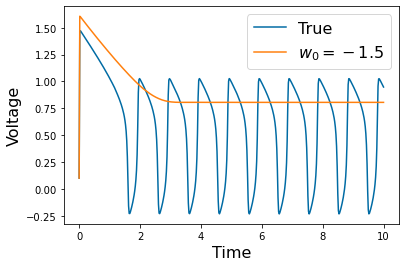

In [97]:

# =============================================================================
# sensitivity section
# =============================================================================
# =============================================================================
# First set-up simulate data
# =============================================================================
params=[.01, 1, .1, -1, .5]
V0=.1
w0=0
tspan = np.linspace(0, 10, 50)
y_soln= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [V0,w0], method='LSODA',t_eval=tspan)
y_data=y_soln.y[0]+.1*np.random.uniform(-1.0, 1.0,len(y_soln.y[0]))
pyplot.plot(y_data,'o')
pyplot.plot(y_soln.y[0],'*')
pyplot.legend(['True', 'With Noise'])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Voltage', fontsize=16)


# =============================================================================
# Begin Sampling and imports
# =============================================================================
from SALib.analyze import sobol
from SALib.analyze import delta

from SALib.sample.morris import sample
#from SALib.plotting.morris import horizontal_bar_plot, covariance_plot, \
#    sample_histograms

# or define parameters for sampling
b=np.empty([len(params),2])

for i in np.arange(len(params)):
    b[i,:]=[.95*params[i],1.05*params[i]]
b.sort(axis=1) # sort the rows that are negative    

problem = {
  'num_vars': 5,
  'names': [r'$\epsilon$', '$A$', r'$\alpha$', '$w_0$', r'$\gamma$'],
  'groups': None,
  'bounds': b
}
# Files with a 4th column for "group name" will be detected automatically, e.g.
# param_file = '../../src/SALib/test_functions/params/Ishigami_groups.txt'

# Generate samples
param_values = sample(problem, N=500, num_levels=4,
                      optimal_trajectories=None)

# To use optimized trajectories (brute force method),
# give an integer value for optimal_trajectories

# Run the "model" -- this will happen offline for external models
Y = np.empty([len(param_values)])
for i in np.arange(len(Y)):
    yp= y_soln= solve_ivp(lambda t,Y: rhs(t,Y,param_values[i]), [tspan[0],tspan[-1]], [V0,w0], method='LSODA',t_eval=tspan)
    Y[i]=np.linalg.norm(yp.y[0]-y_data)
# Perform the sensitivity analysis using the model output
# Specify which column of the output file to analyze (zero-indexed)
Si = sobol.analyze(problem, Y, calc_second_order=True, conf_level=0.95, print_to_console=True)
Si1 = delta.analyze(problem, param_values, Y, print_to_console=True)
bar_width=.35
pyplot.figure()
pyplot.bar(np.arange(len(params_list))-.5*bar_width,Si['S1'], bar_width)
pyplot.bar(np.arange(len(params_list))+.5*bar_width,Si1['S1'], bar_width)
pyplot.legend(['Sobol', 'Moment Independent'],fontsize=16)
pyplot.xticks(np.arange(len(params_list)), params_list)
pyplot.ylabel('SA',fontsize=16)

#pyplot.savefig('FHN_delta.png')
# =============================================================================
# compare with varying parameters to compare variations in output. 
# One could be more precise by sampling over reduced parameter space.
# =============================================================================
params=[.01, 1, .1, -1, .5]
V0=.1
w0=0
tspan = np.linspace(0, 10, 500)
pyplot.figure()

y_true= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [V0,w0], method='LSODA',t_eval=tspan)
params=[.01, 1, 1, -1, .5]
V0=.1
w0=0
tspan = np.linspace(0, 10, 500)
y_alpha= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [V0,w0], method='LSODA',t_eval=tspan)
params=[.1, 1, .1, -1, .5]
V0=.1
w0=0
tspan = np.linspace(0, 10, 500)
y_eps= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [V0,w0], method='LSODA',t_eval=tspan)
params=[.01, 1, .1, -1.5, .5]
V0=.1
w0=0
tspan = np.linspace(0, 10, 500)
y_w= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [V0,w0], method='LSODA',t_eval=tspan)

pyplot.figure()
pyplot.plot(tspan, y_true.y[0])
pyplot.plot(tspan, y_alpha.y[0])
pyplot.legend(['True', r'$\alpha=.5$'],fontsize=16)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Voltage', fontsize=16)
#pyplot.savefig('FHN_compare_alpha.png')


pyplot.figure()
pyplot.plot(tspan, y_true.y[0])
pyplot.plot(tspan, y_eps.y[0])
pyplot.legend(['True', r'$\epsilon=.1$'],fontsize=16)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Voltage', fontsize=16)
#pyplot.savefig('FHN_compare_eps.png')


pyplot.figure()
pyplot.plot(tspan, y_true.y[0])
pyplot.plot(tspan, y_w.y[0])
pyplot.legend(['True', r'$w_0=-1.5$'],fontsize=16)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Voltage', fontsize=16)
#pyplot.savefig('FHN_compare_w.png')


# Genetics

## Rock-Paper-Scissors

### Dynamics

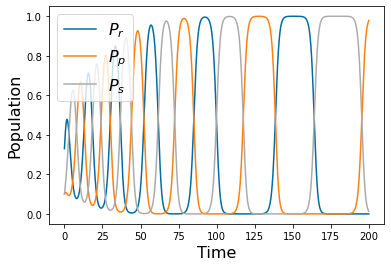

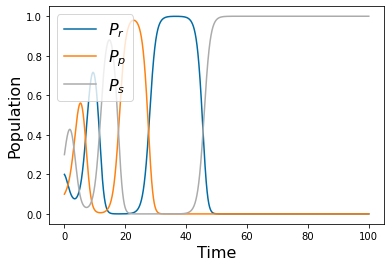

In [98]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 26 11:34:10 2021
Rock-Paper-scissors model. DOE model SA based on the paper:
   Sarah C Cotter. A screening design for factorial experiments with
   interactions. Biometrika, 66(2):317–320, 1979. 
@author: cogan
"""



from IPython import get_ipython
get_ipython().magic('reset -sf')
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.integrate import solve_ivp
import itertools
pyplot.close('all')
pyplot.style.use('tableau-colorblind10')  #Fixes colorscheme to be accessible

#Define the RHS of ODEs
def f1(t,Y,params):
    Pr,Pp,Ps=Y
    alpha_1, alpha_2, alpha_3, beta_1, beta_2, beta_3= params
    return  Pr*(1-Pr-alpha_1*Pp-beta_1*Ps)
def f2(t,Y,params):
    Pr,Pp,Ps=Y
    alpha_1, alpha_2, alpha_3, beta_1, beta_2, beta_3= params
    return  Pp*(1-Pp-alpha_2*Ps-beta_2*Pr)
def f3(t,Y,params):
    Pr,Pp,Ps=Y
    alpha_1, alpha_2, alpha_3, beta_1, beta_2, beta_3= params
    return  Ps*(1-Ps-alpha_1*Pr-beta_1*Pp)

def rhs(t,Y,params):
    Pr,Pp,Ps=Y
    alpha_1, alpha_2, alpha_3, beta_1, beta_2, beta_3= params
    return [f1(t,Y,params),f2(t,Y,params),f3(t,Y,params)]
params_list=[r'$\alpha_1$',r'$\alpha_2$',r'$\alpha_3$', r'$\beta_1$',  r'$\beta_2$',  r'$\beta_3$']
#Change IC to show excitable
params=[.2,.2,.2,2,2,2]
Rr0=.33
Rp0=.1
Rs0=.1
tspan = np.linspace(0, 200, 4000)
y_soln= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [Rr0,Rp0,Rs0], method='LSODA',t_eval=tspan)
pyplot.plot(y_soln.t,y_soln.y[0])
pyplot.plot(y_soln.t,y_soln.y[1])
pyplot.plot(y_soln.t,y_soln.y[2])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Population', fontsize=16)
pyplot.legend(['$P_r$', '$P_p$','$P_s$'], fontsize=16,loc='upper left')
#pyplot.savefig('rps_1.png')

pyplot.figure()

params=[.05,.05,.05,3,3,3]
Rr0=.2
Rp0=.1
Rs0=.3
tspan = np.linspace(0, 100, 4000)
y_soln= solve_ivp(lambda t,Y: rhs(t,Y,params), [tspan[0],tspan[-1]], [Rr0,Rp0,Rs0], method='LSODA',t_eval=tspan)
pyplot.plot(y_soln.t,y_soln.y[0])
pyplot.plot(y_soln.t,y_soln.y[1])
pyplot.plot(y_soln.t,y_soln.y[2])
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Population', fontsize=16)
pyplot.legend(['$P_r$', '$P_p$','$P_s$'], fontsize=16,loc='upper left')
#pyplot.savefig('rps_2.png')
#

### Factorial Design

Text(0.5, 0, 'Parameter')

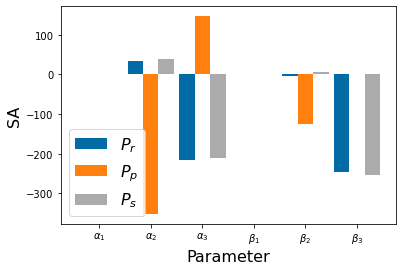

In [99]:

# =============================================================================
# make the design matrix indicating high and low values
# =============================================================================


X1=[1,-1] # two factor
number=0
DOE=np.empty([2**len(params),len(params)])
for combination in itertools.product(X1,repeat=len(params)):
    DOE[number,:]=combination
    number+=1
#NOTE that DOE is in backwards order. The last column corresponds to the first parameter etc.
params=[.2,.2,.2,2,2,2]
Rr0=.1
Rp0=.1
Rs0=.1

responser=np.empty([2**len(params)])      #do this for each species
responsep=np.empty([2**len(params)])    
responses=np.empty([2**len(params)])    

for k in np.arange(2**len(params)):
    params1=params+np.multiply(params,.9)*DOE[k,:]
    y_soln= solve_ivp(lambda t,Y: rhs(t,Y,params1), [tspan[0],tspan[-1]], [Rr0,Rp0,Rs0], method='RK45',t_eval=tspan)
    responser[k]=sum(tspan[np.argwhere(y_soln.y[0]>.8)])/tspan[-1]
    responsep[k]=sum(tspan[np.argwhere(y_soln.y[1]>.8)])/tspan[-1]
    responses[k]=sum(tspan[np.argwhere(y_soln.y[2]>.8)])/tspan[-1]

Cotter_SAr=np.empty(len(params))
Cotter_SAp=np.empty(len(params))
Cotter_SAs=np.empty(len(params))

for i in np.arange(len(params)):
    Cotter_SAr[len(params)-1-i]=np.sum(DOE[:,i]*responser)/2**len(params)/2
    Cotter_SAp[len(params)-1-i]=np.sum(DOE[:,i]*responsep)/2**len(params)/2
    Cotter_SAs[len(params)-1-i]=np.sum(DOE[:,i]*responses)/2**len(params)/2
    
bar_width=.3
pyplot.figure()
pyplot.bar(np.arange(len(params_list))-1*bar_width,Cotter_SAr, bar_width)
pyplot.bar(np.arange(len(params_list))-0*.5*bar_width,Cotter_SAp, bar_width)
pyplot.bar(np.arange(len(params_list))+1*bar_width,Cotter_SAs, bar_width)
pyplot.legend(['$P_r$', '$P_p$', '$P_s$'],fontsize=16)
pyplot.xticks(np.arange(len(params_list)), params_list)
pyplot.ylabel('SA',fontsize=16)
pyplot.xlabel('Parameter',fontsize=16)
#pyplot.savefig('cotter.png')